# Starting a software project by planning

In the previous chapter we configured and installed our package. We also made sure that all developpers working on the project will install the exact same versions of the dependencies.

In this chapter we will tackle the main part of developing a software package: writing the actual code of the package. Obviously we won't develop a large package with multiple modules but we will try to see here the conventions and best practices that we try to enforce at Aramis. We will also discover additional tools which will make our life easier. Let's get to it !

## Planning things in advance

The purpose of our calculator library is to perform calculations on images, so let's plan in advance what we will do, how we will do it and when.

We anticipate that, at some point in time, we should have implemented the following functionalities:

- addition of two images
- subtraction of two images
- multiplication of two images
- division of two images
- reduction of a list of images using one of the operation above

Having these correctly implemented, we will say that our project has reached a good level of maturity, and we'll call that `v1.0.0` to convey this stability message to the rest of the community. We are thinking long term here and we have a few concepts that are popping up:

- the **version number**: In the Aramis team we rely on [semantic versioning](https://semver.org), which is encoded in these 3 numbers separated by dots. They all have a meaning and convey some information about the state of the package. Note that there exists other conventions for versioning such as [calendar versionning](https://calver.org) for instance.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Use semantic versioning and respect the meaning of it.</p>
</div>

- a **milestone**: this is basically an objective in the software development cycle. It usually has a name, a date, and a small description. It is also linked to a list of things that should be done to reach this point. Milestones can be configured on Github and issues and Pull Requests can be linked to them to encode these list of things that should be done.

## Exercice

### Build the road map of the project

We can go to our Github repository and create 5 issues: one for each operation that we should implement. These issues should be descriptive enough for other developers to understand the problem and the solution proposed. If needed, discussions could take place to agree on what should be done. Sometimes, this can lead to the issue being fragmented into several sub-issues as the problem is being divided into sub-problems.

We could create our `v1.0.0` milestone and link it to these 5 issues that we just created. However, that would mean a giant step from nothing to a fully functional v1, meaning that, while we are working on it, nobody from the outside world will get the chance to discover and use our package. Furthermore, we are violating one key principle of the modern agile frameworks which is to release often with small incremental changes.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Release often with small incremental changes.</p>
</div>

Let's take that into account and replan our project! Having 5, 4, 3, 2, or even 1 operation implemented is already better than nothing, and could be useful for some users. So let's plan for a `v0.1.0` with only the addition implemented (as it is clearly the most simple operation as you might remember from your first days at school...). We would then move on to `v0.2.0` with the addition of the subtraction, `v0.3.0` with the mutliplication, `v0.4.0` with the division, and finally, our final goal: `v1.0.0` with the all operations and the reduction of a list of images. 

Let's start by creating the milestones. Here is what it should look like for the `v0.1.0` milestone:

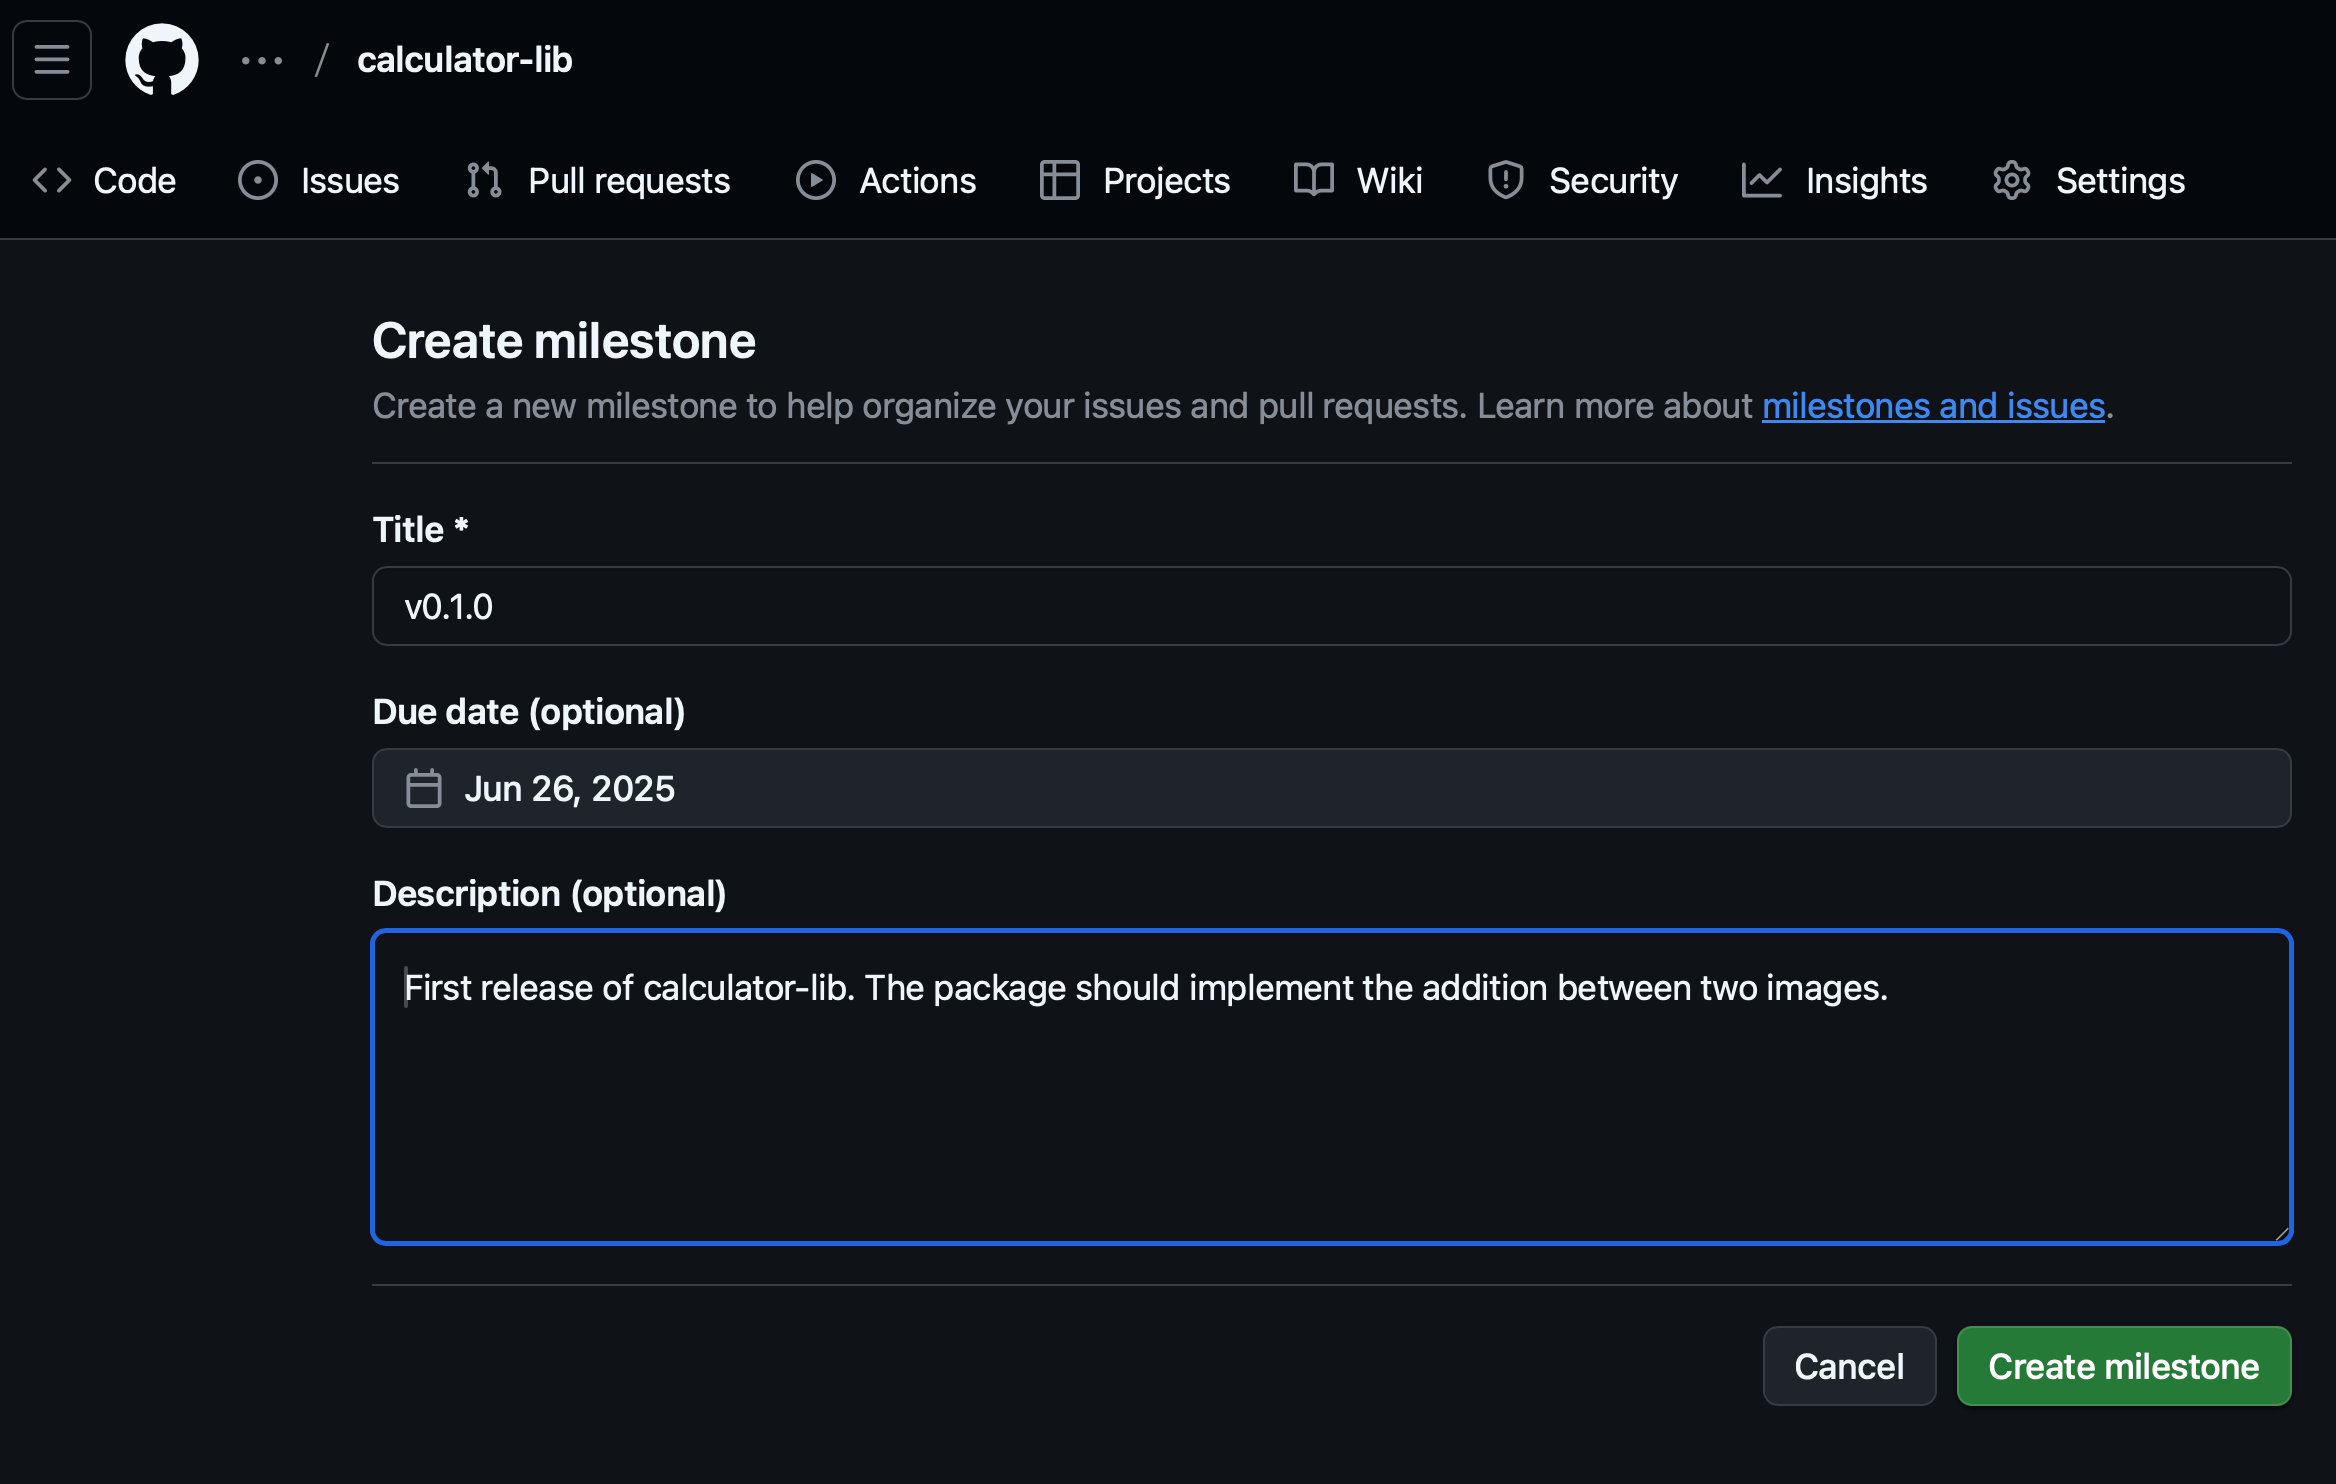

In [8]:
from IPython.display import Image

Image(filename="../images/milestone.png")

Once finished, you should have 5 milestones, each corresponding to an anticipated release. Great!

Let's now open the issues we planned. Here is what the creation of the first issue (implementing the addition) should look like:

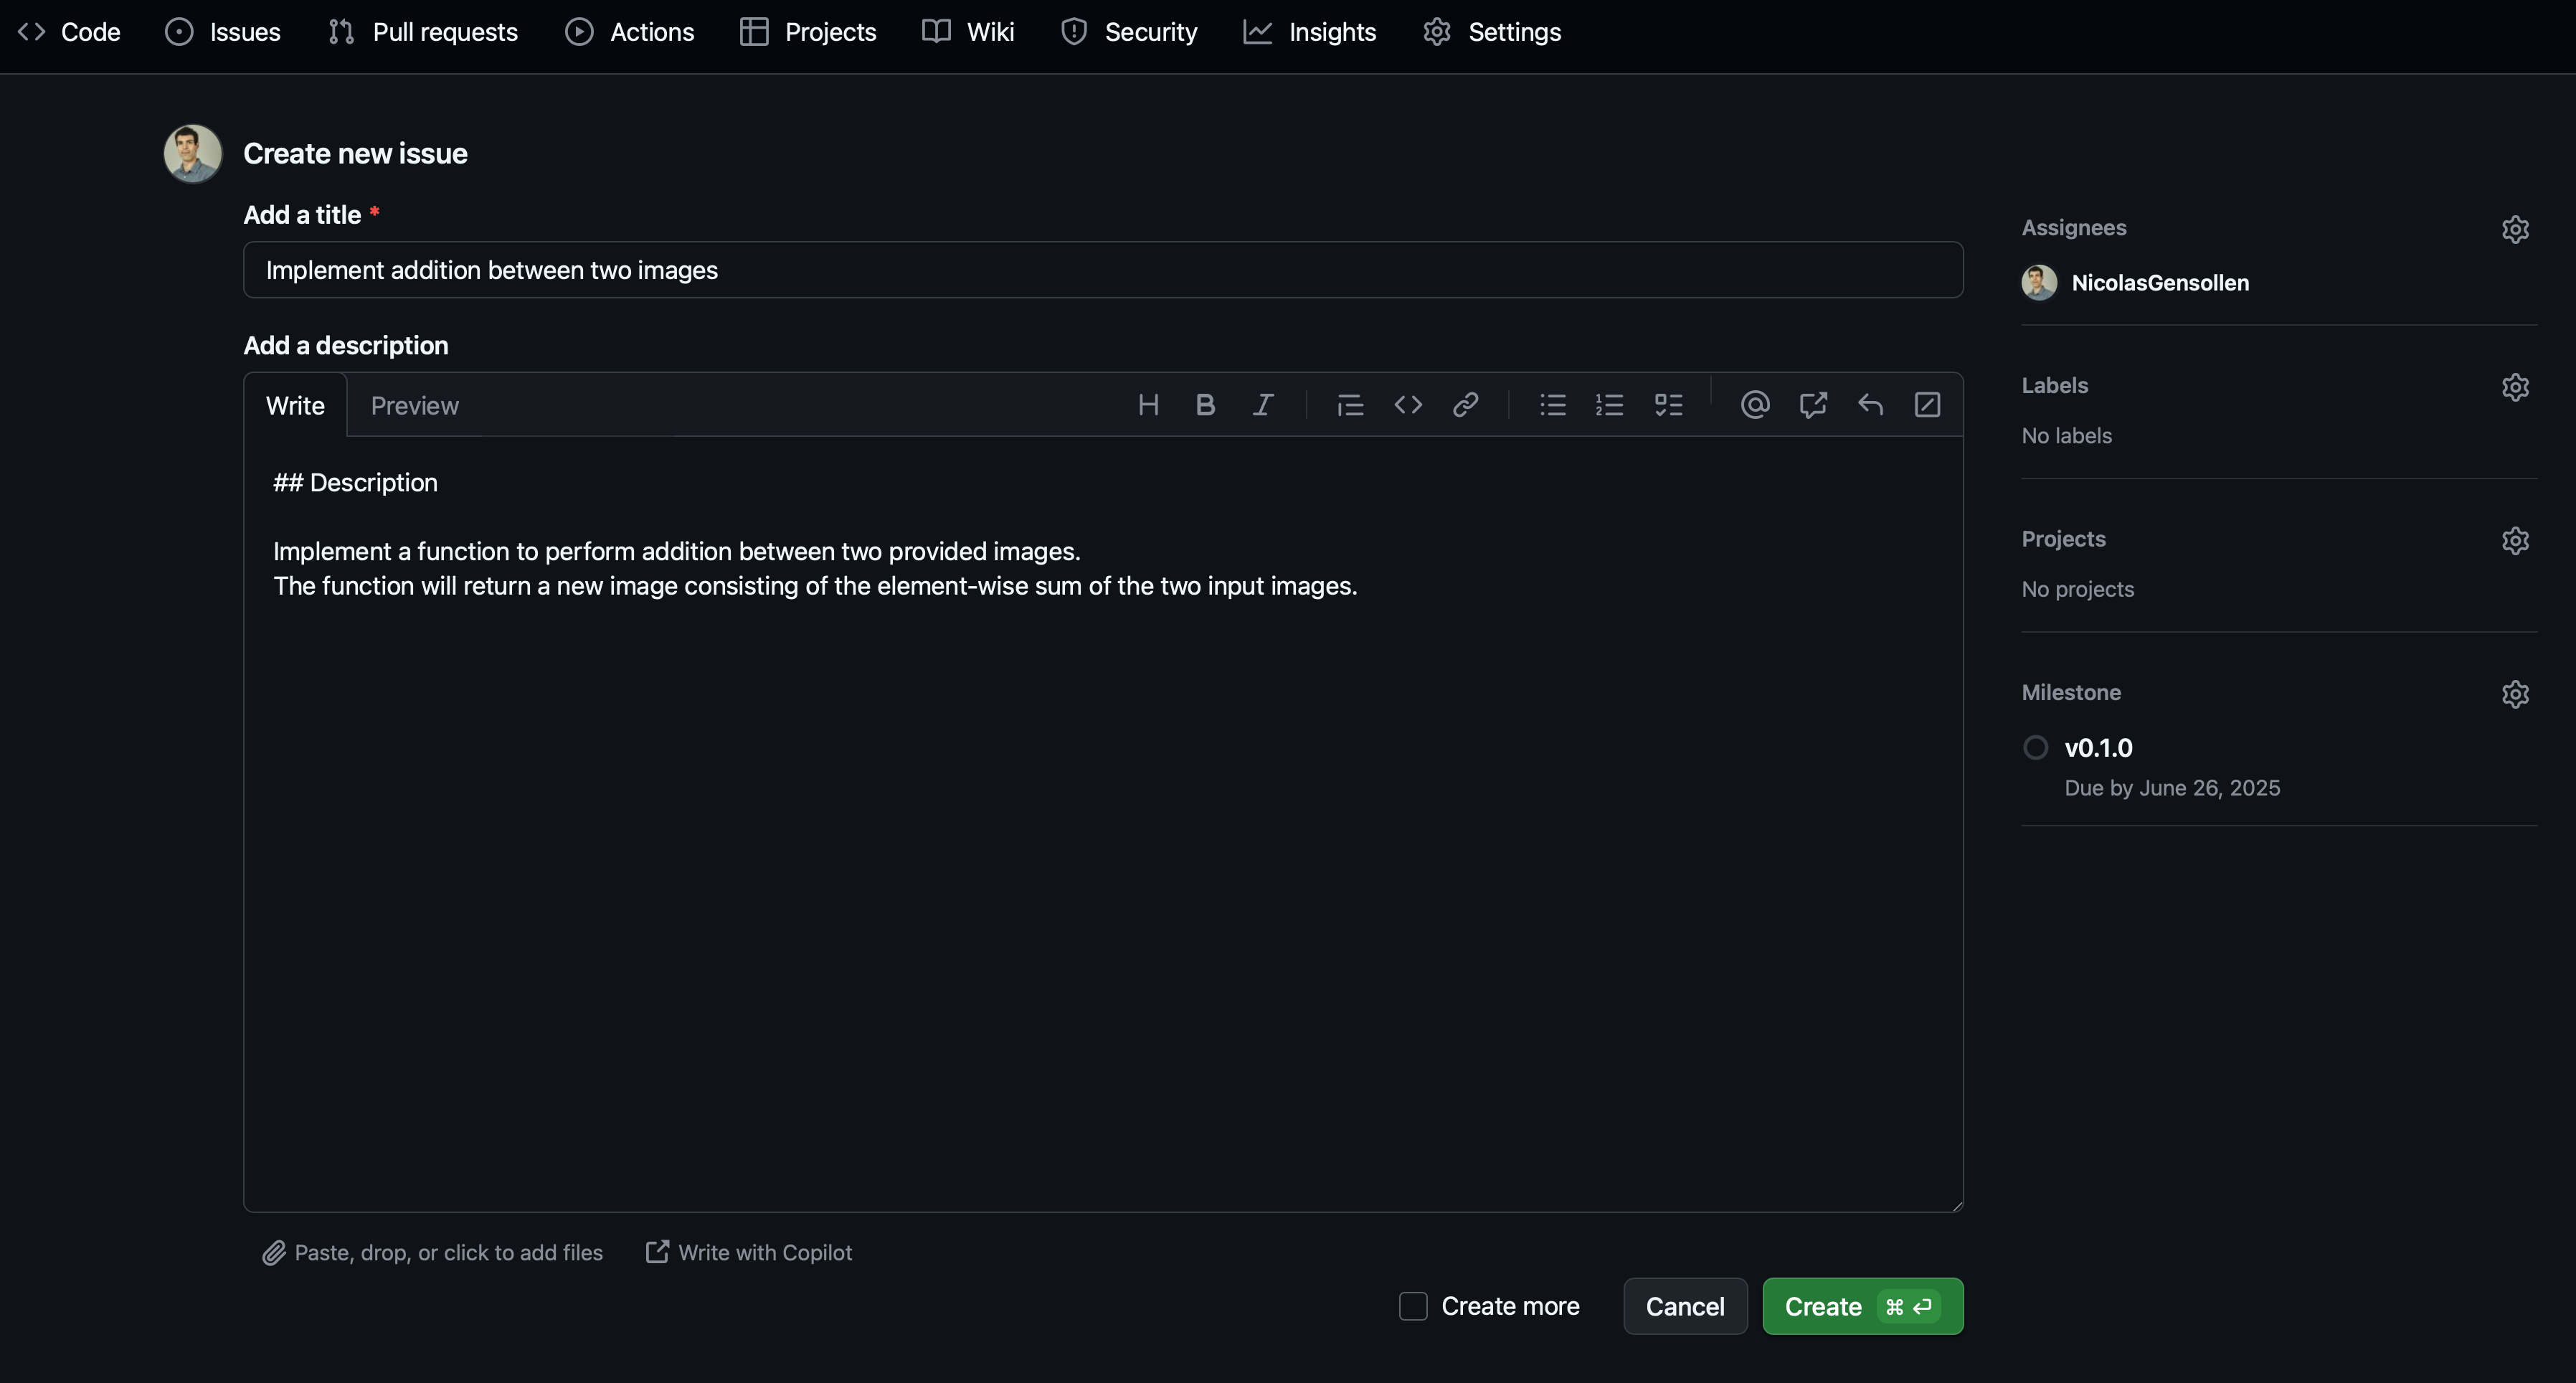

In [9]:
Image(filename="../images/issue.png")

Pay attention to the column on the right where you can put some important metadata. You can assign yourself since you will be working on it soon, and add the right milestone to each issue.

If we were working on a real project, we should also add the issues to the project managment tool of GitHub in order to get nice project tracking visuals.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Always try to add metadata to the issues you create. This will help not to forget about them.</p>
</div>

Once finished, you should have a list of issues looking like that:

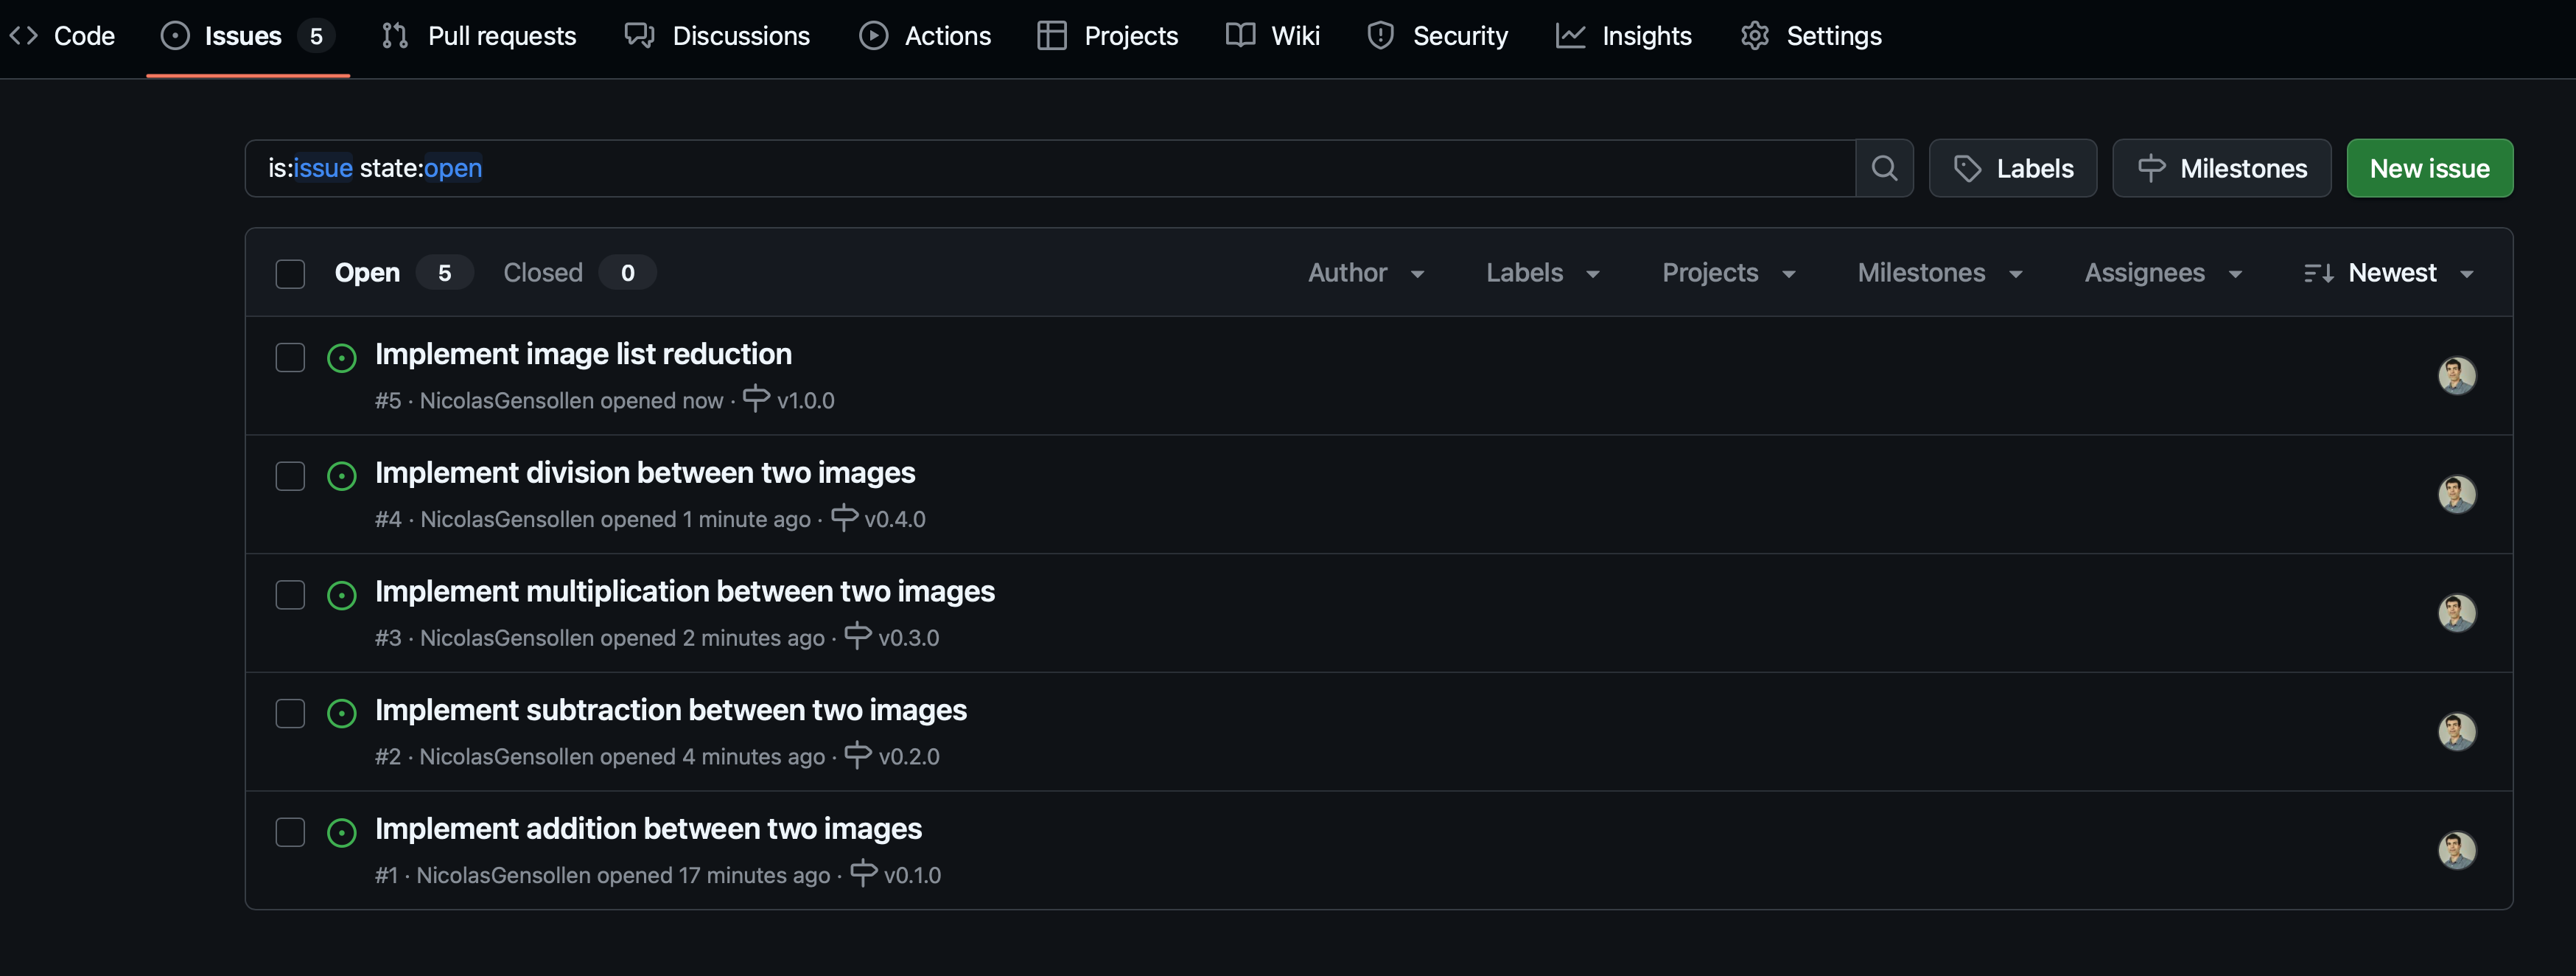

In [10]:
Image(filename="../images/issue_list_1.png")

And a list of milestones looking like that:

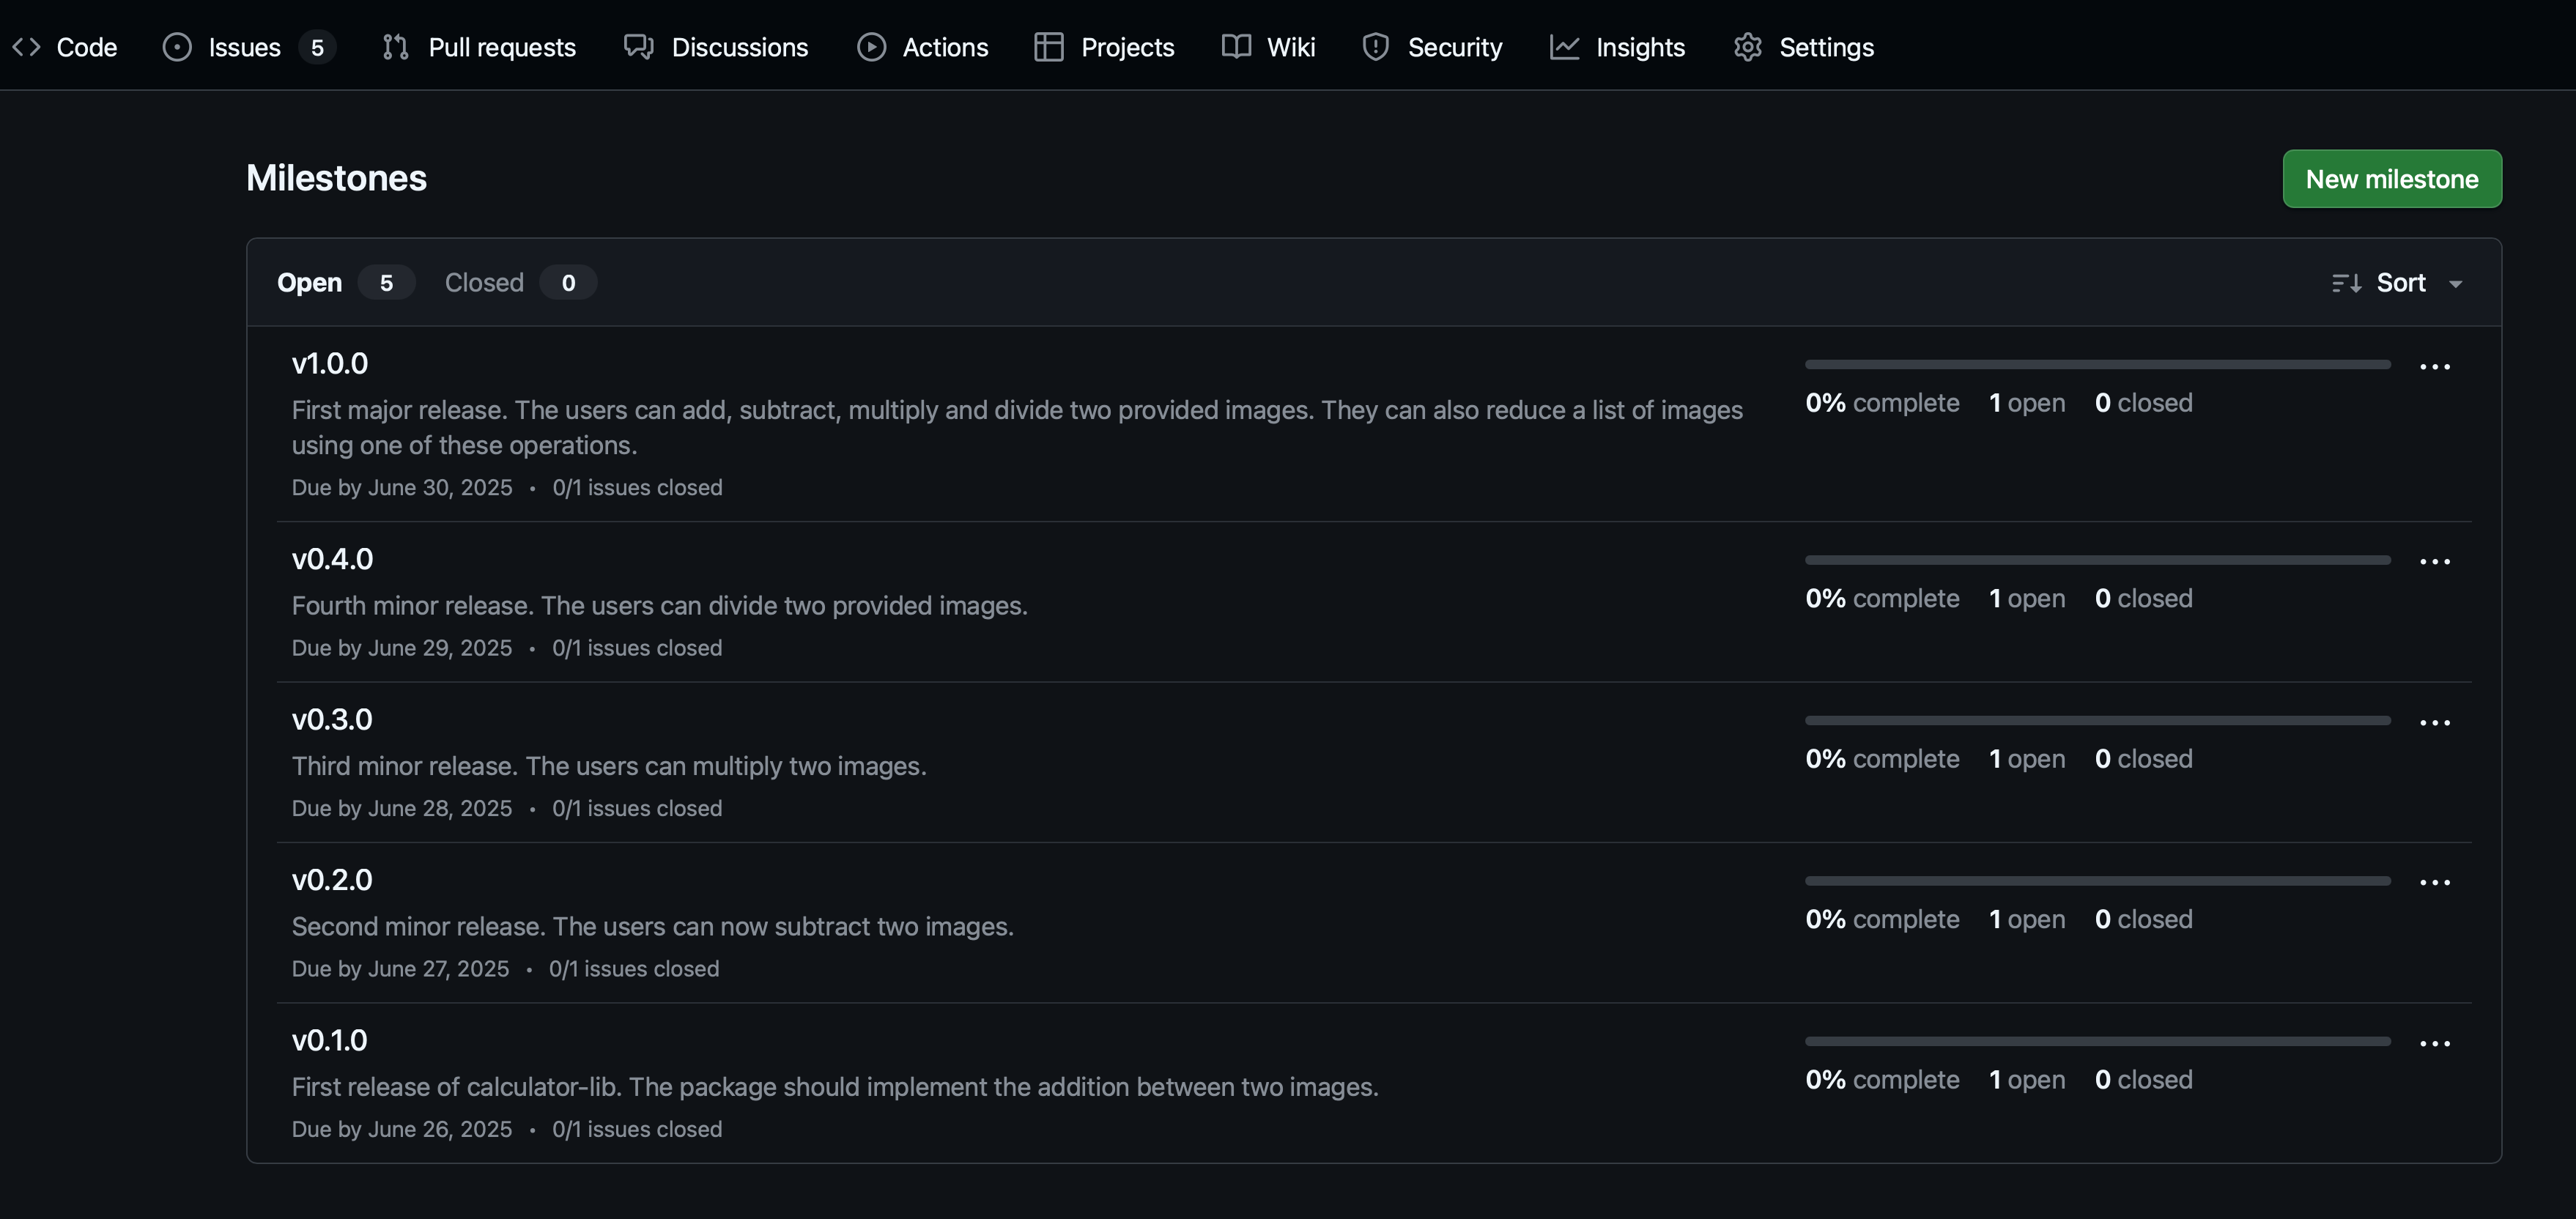

In [11]:
Image(filename="../images/milestone_list.png")

### Designing the public API of our package

Alright, enough planning for now! Let's get to it and work on our first milestone, composed of a single issue for now: *implement the addition of two images*.

We need to think in advance about how our users will interact with our library and what they will do.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Take <b>A LOT OF TIME</b> to think about the way users will interact with the package.</p>
    <p>Ideally, you should have a pretty good idea of what your public API will look like.</p>
</div>

After some thinking, we would like to have something like that:

```python
from calculator import add, Image

# Add two images written to disk and return an Image object
img = add("./image1.img", "./image2.img")

# Display the image as a string
print(img)

# Plot the image using several backends
img.plot("matplotlib")

# Build Image objects using files and raw data and add them
img2 = add(Image.from_file("./image1.img"), Image.from_array([[1, 2], [3, 4]]))

img2.plot("seaborn")
```

The API would look roughly the same for the other operations and we anticipate something like that for the reduction:

```python
from calculator import reduce

img = reduce(
    ["./image1.img", "./image2.img", "./image3.img"],
    how="multiply",
)
```

### Replan the short term roadmap

Our roadmap just received a lot of extra work as we now have way more things to implement than we anticipated... It looks like we need:

- An `Image` object which we will use to represent an image loaded into our package.
- The `Image` object should have multiple constructors such that users can create them from file paths, raw data, and so on...
- The `Image` object should have a string representation in order to print it.
- The `Image` object should be plottable with various plotting engines in order to get nice visuals.
- The addition function should support various input types (`Image` objects, file paths, raw data...).

Obviously we are not going to implement all of this in one PR ! So let's formalize our planning by opening issues. We need to open one for the creation of the `Image` object, one for the implementation of our custom constructors, one for adding the string representation, and one for plotting. We will stay simple, but we could divide some of these issues further. For example, the could have two sub-issues for the plotting of images: one for matplotlib support and one for seaborn support.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Try to have issues and PRs as atomic as possible. One issue for one problem and one PR to address one problem only.</p>
    <p>Resist the temptation to fix small unrelated things that you see while working on a PR. Take notes and open issues to remind you to address them later.</p>
    <p>Working this way will help you, as the developer of the feature, but also the reviewers of your PR.</p>
</div>

Let's open our issues. For example, the first issue should look like that:

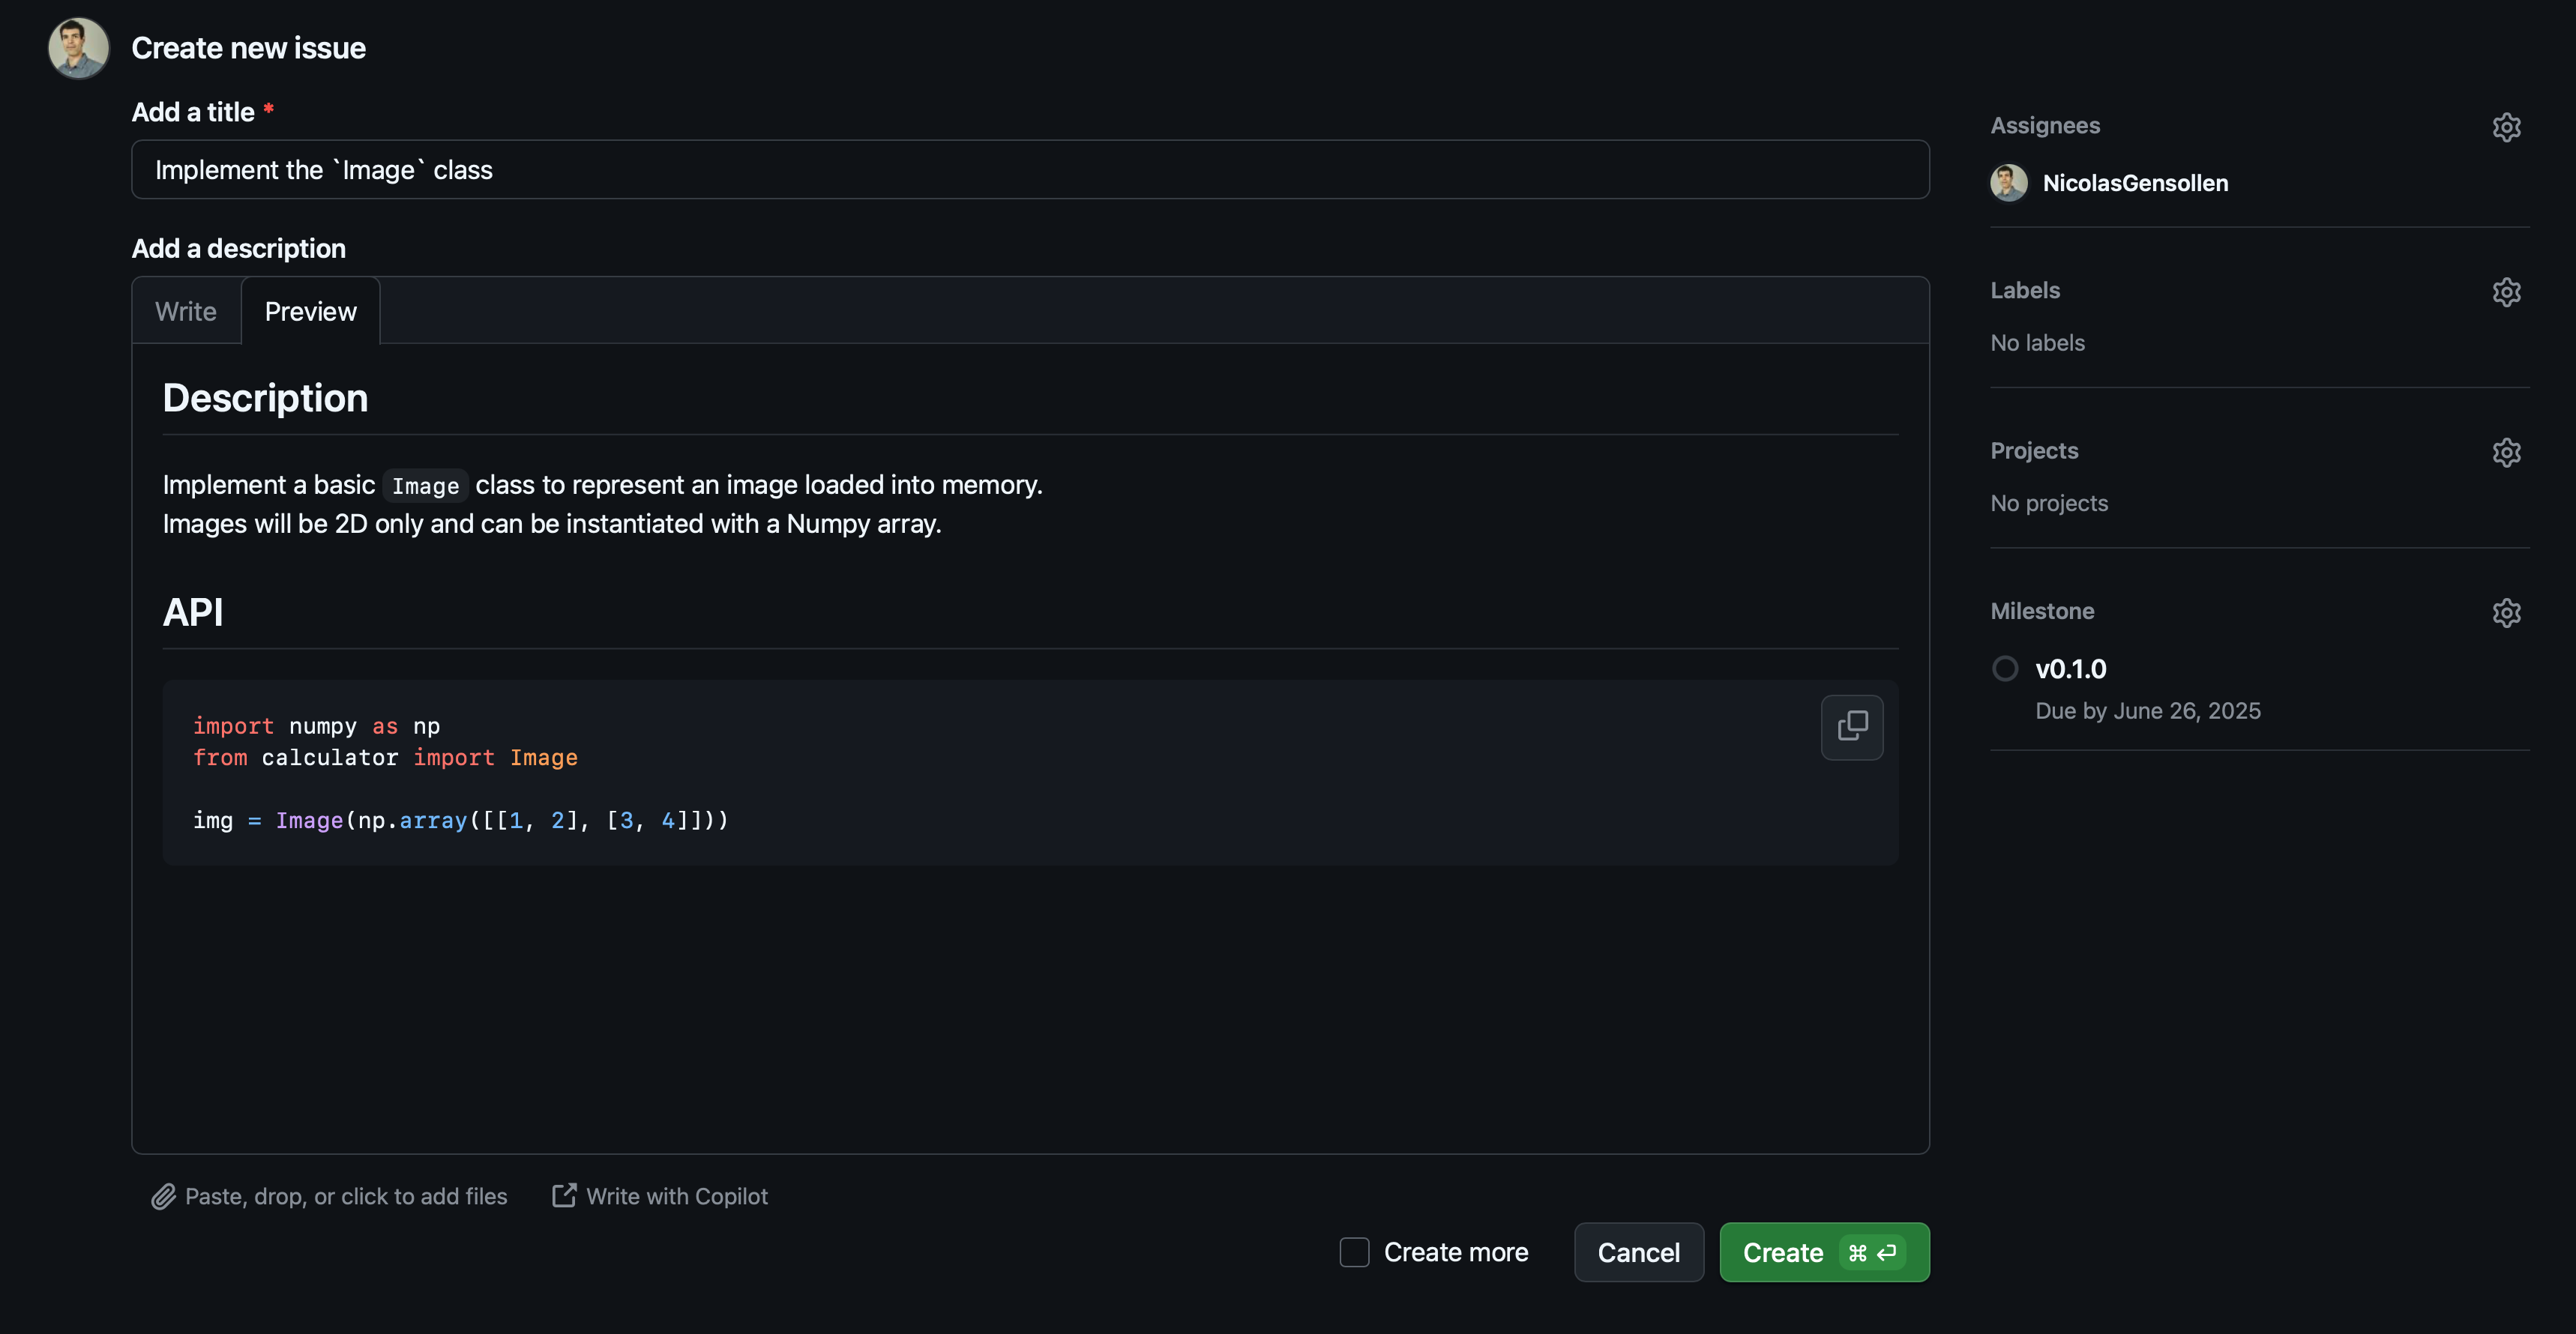

In [12]:
Image(filename="../images/issue_2.png")

Once finished, your list of issues should have grown quite a bit and look like that:

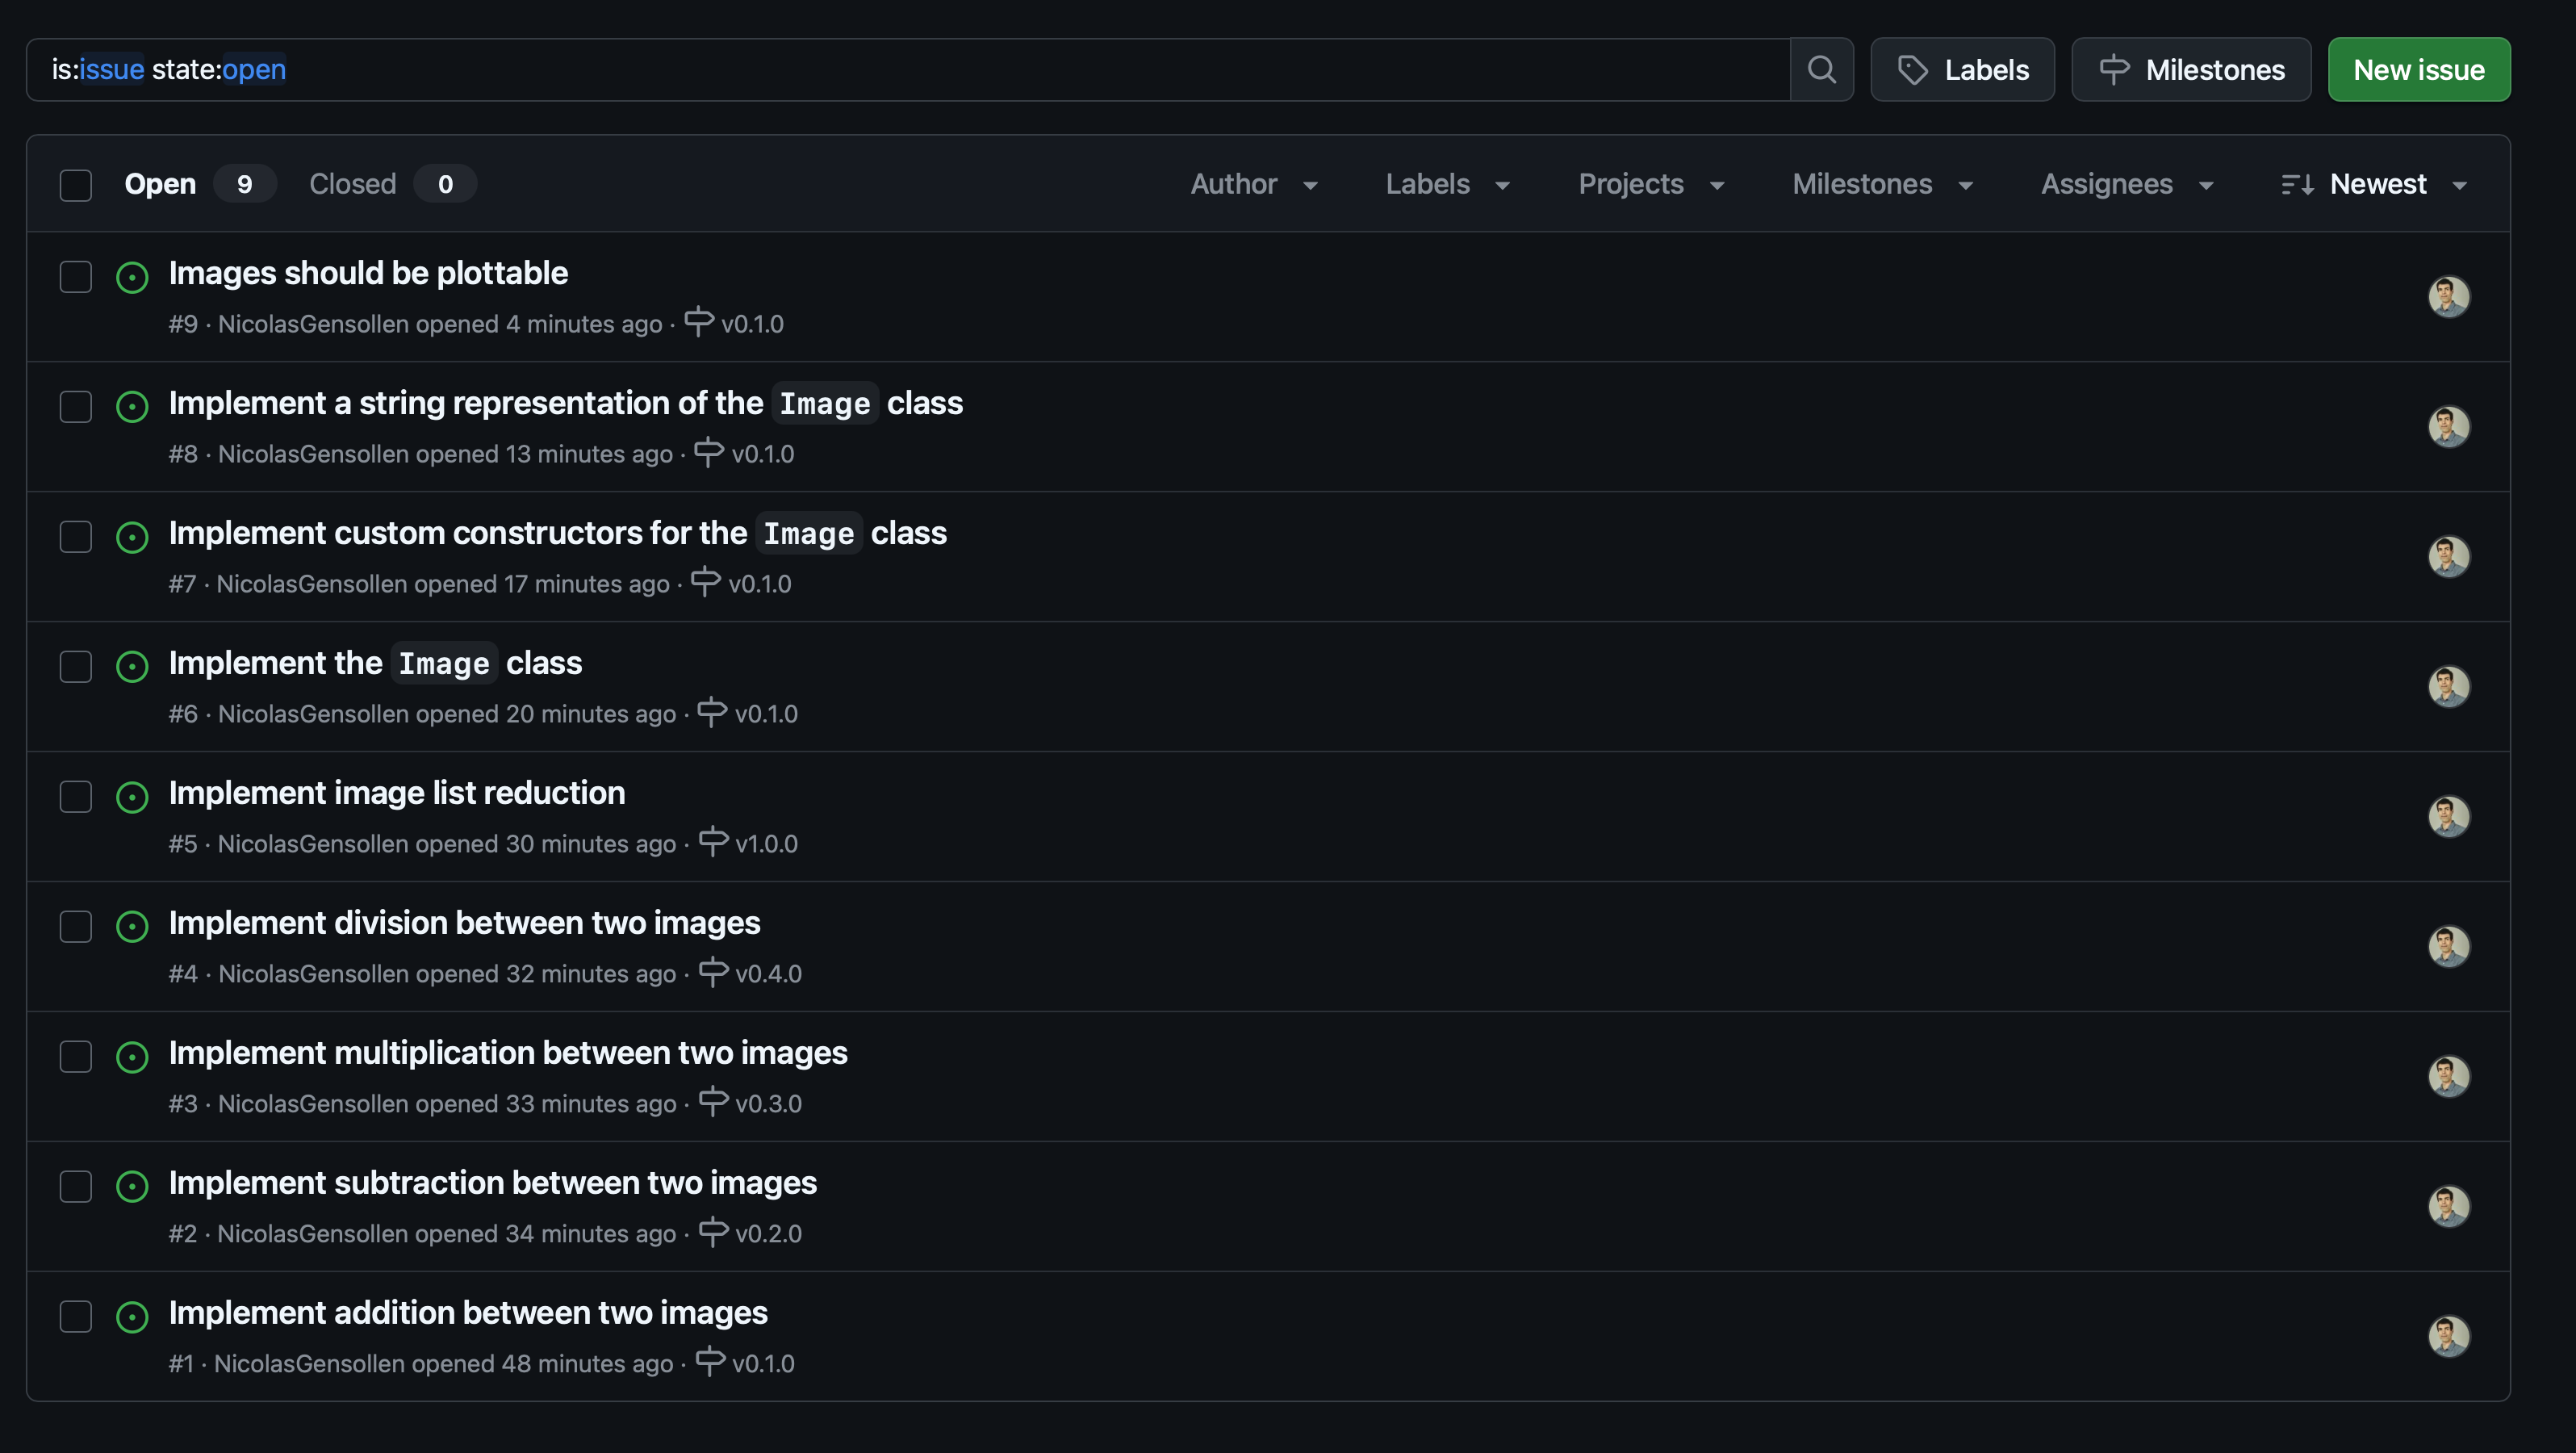

In [13]:
Image(filename="../images/issue_list_2.png")

Also note that our first milestone just got bigger:

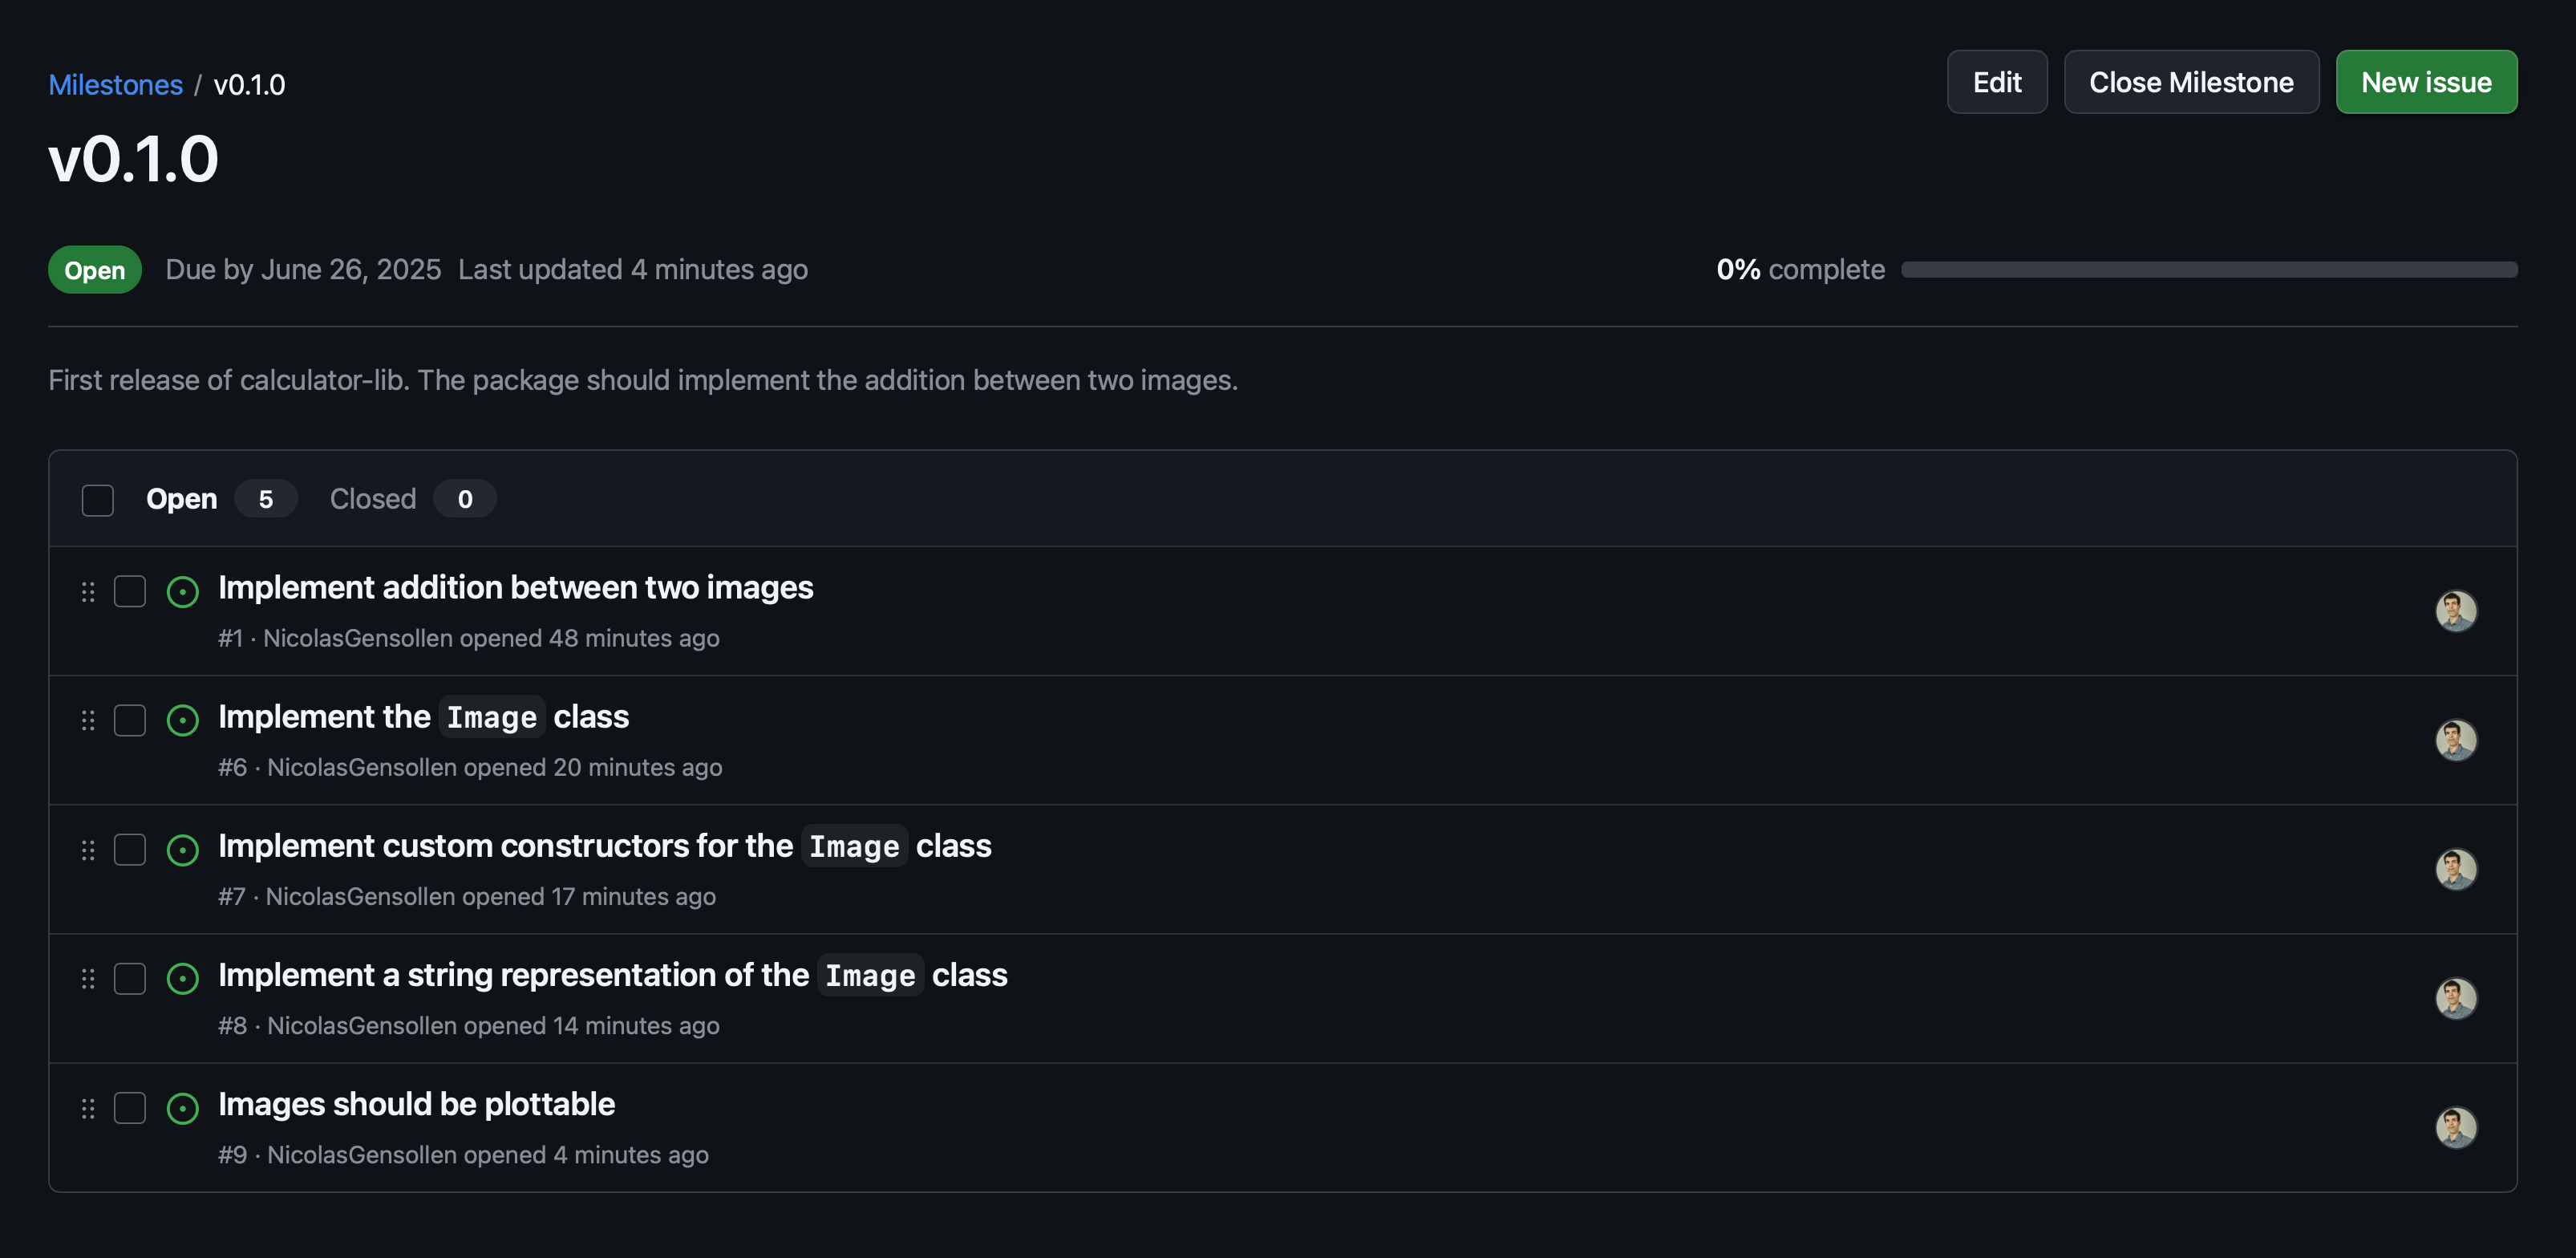

In [14]:
Image(filename="../images/milestone_details.png")

We have put all our new issues into the `v0.1.0` milestone, but we have some bandwidth to re-organize things a bit. We could delay the string representation as well as the plotting to a later milestone. We could even replan the project and put those two issues for a new `v0.2.0` milestone while shifting the rest in the future. As a project leader you will end up doing those things a lot! For the moment, let's leave things like this.

We now have a project well planned with long term items that are still vague, but referenced in issues and milestones, as well as short term items with way more precise descriptions.

It's now time to stop planning again and start implementing things!

Since we are going to work on a new feature, let's do it right and create two more branches:

- one called `dev` that we will use to contain our development work that hasen't been released yet.
- one called `basic-image-definition` on which we will work on our first feature.

```bash
$ git switch -c dev
$ git push origin dev
$ git switch -c basic-image-definition
```

### Implement a first feature: the Image class

Let's create a new file `src/calculator/image.py` and write a basic definition for our `Image` object:

In [1]:
import numpy as np


class Image:
    """Class representing an image loaded in memory."""
    def __init__(self, data: np.ndarray):
        if not isinstance(data, np.ndarray) or data.ndim != 2:
            raise TypeError("Image data should be a 2D Numpy array.")
        self._data: np.ndarray = data

A few things to note:

- we used type hints.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Use type hints !! By relying on your IDE or more advanced tools like Mypy they will help you catch countless bugs.</p>
</div>

- we declared the data attribute of our class as private by adding a "_" prefix as we don't want the users to interact directly with the image data.

Python is a permissive language and the notion of private objects does not exist as it does in other languages such as C++, Java, or Rust. In Python, there is a convention in the community to prepend private things with an "_". Python won't do anything special and you can still access and mutate private objects, but at least you know that you're doing something potentially wrong.

For basic scripting, these considerations do not really matter and we don't need to pay attention to those details, but in real softwares, hidding implementation details in private code while providing a consistent public API is a key for success. When working on Aramis software, you therefore need to get used to thinking in terms of public vs. private.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Private objects have a name starting with an "_"</p>
</div>

- we wrote some data validation code to make sure the user-provided data for our image is a 2D Numpy array. We won't have to do this check anywhere else in our code base. This is MUCH better than working with bare Numpy arrays and doing the validation at the begining of every function.

Now that we have implemented our `Image` class, we can try our new object. Open a Python interpreter and try these:

In [5]:
img = Image(np.array([[1, 2], [3, 4]]))
img

In [6]:
print(img._data)

[[1 2]
 [3 4]]


In [4]:
Image(1)

TypeError: Image data should be a 2D Numpy array.

Alright, it seems to work as expected.

But wait ! Why would you throw away what you just did ? You did it for the sake of trying, but you could do way better: you could do it for the sake of **TESTING** !

### Writting unit tests

Let's rewrite our first experiment above with a key difference:

In [7]:
assert isinstance(Image(np.array([[1, 2], [3, 4]])), Image)

That's it ! That's basically enough to turn our first experiment into a unit test. This test checks that we can instantiate our `Image` object by providing a 2D numpy array, which is exactly the behavior we want.

At this point, we need two more things to turn this simple assertion into a re-usable unit test:

- somewhere (other than the interpreter...) to write the test
- a testing framework

Let's start with the testing framework. There exists multiple testing frameworks in Python, but in the Aramis team we all use the extremely famous `pytest`. It's the reference in the Python world and you will gain a lot by learning how to use it.

#### Installing pytest

At the moment, we don't have `pytest` installed. We thus need to add it to our dependencies. We could do the exact same thing as what we did in the previous chapter for `Numpy`, but there is one small distinction here: regular users of the package won't run the unit tests, they simply don't care about that! They assume you, as a developer, did that already and that they can directly jump into using the package. Because they don't need pytest, it would be a waste of computer memory and electricity to make them download and install it.

Fortunately, we can organize our dependencies into *groups*. This is a super useful concept as you can define groups and only install dependencies of one or several groups. When packaging our project, dependencies in special groups will be ignored while they will be taken into account when doing `poetry install`.

Let's add `pytest` to a new group called `dev`:

```bash
$ poetry add pytest --group dev
Using version ^8.4.1 for pytest

Updating dependencies
Resolving dependencies... (0.6s)

Package operations: 5 installs, 0 updates, 0 removals

  - Installing iniconfig (2.1.0)
  - Installing packaging (25.0)
  - Installing pluggy (1.6.0)
  - Installing pygments (2.19.1)
  - Installing pytest (8.4.1)

Writing lock file
```

We can see how this updated our package specifications:

```bash
$ git diff pyproject.toml
diff --git a/pyproject.toml b/pyproject.toml
index 17ad9b5..6b6fcd1 100644
--- a/pyproject.toml
+++ b/pyproject.toml
@@ -19,3 +19,7 @@ dependencies = [
 [build-system]
 requires = ["poetry-core>=2.0.0,<3.0.0"]
 build-backend = "poetry.core.masonry.api"
+
+[tool.poetry.group.dev.dependencies]
+pytest = "^8.4.1"
+
```

As you can see, `pytest` was not added to the list of dependencies, but to a new list called `group.dev.dependencies`. Since we didn't specify any version constraint on `pytest`, Poetry assumed we wanted the latest version of it.

#### What is a unit test and how to organize them

Let's create a new folder named `tests` at the root of our project. Note that tests will therefore be in a completely different area than the source code of our package.

In the `tests` folder we will put all of our tests. You might already know that there exists different types of tests such as unit tests, functional tests, end-to-end tests and so on. They all have different reasons to exist and test your package in different ways. The unit tests are the first line of defense against bugs, they are your best allies in your day to day work and therefore you need to treat them with care!

A unit test must respect of few principles:

- It should test a single functionality in isolation (even very simple functions have multiple unit tests as we will see).
- The isolation word above is important: you can run your unit tests in any order as they are **completely independant of each other**.
- A unit test starts by creating the data it needs to test a functionality, call the object from the package with the data, and checks that the behavior is as expected.
- The input data should be **as simple as possible**. Remove everything not needed for your test and use simple values if possible.
- A unit test cannot depend on external things such as external API calls or even an internet connection. You will sometime need to *mock* things in order to respect this principle.
- Unit tests should be **FAST** !! As there will be a lot of them and as you will run them all the time, you clearly don't want to wait 10 minutes each time you do so. So a single unit test should clearly run in the order of the second.

OK, that's a lot of rules to grasp, but they will quickly become natural as you practice writing and execting unit tests.

In this tutorial we will focus on unit tests only but the techniques used would be similar for other types of tests. Still, let's plan for the future where we will potentially have other kinds of tests and create a new subfolder called `unittests`. Inside this folder create a new file called `image_test.py`:

```bash
$ mkdir -p tests/unittests
$ touch tests/unittests/image_test.py
```

Note that the file name has "test" at the end of it. This is mandatory as `pytest` will only treat files starting or ending with "test" as test files. Both conventions can be seen but having "test" at the end can make file easier to find when you have a lot of them.

At this point, you should have the following file structure:

```bash
$ tree
.
├── LICENSE
├── README.md
├── environment.yml
├── poetry.lock
├── pyproject.toml
├── src
│   └── calculator
│       ├── __init__.py
│       └── image.py
└── tests
    └── unittests
        └── image_test.py
```

#### Writting and running unit tests

In `image_test.py` let's write our first unit test:

```python
import numpy as np
from calculator.image import Image


def test_image_instantiation():
    """Test the correct instantiation of the Image class with a 2D Numpy array."""
    assert isinstance(Image(np.array([[1, 2], [3, 4]])), Image)
```

As you can see, we encapsulated our assertion from earlier into a function with a meaningful name. Take some time to come up with good names as this is what you will see in the pytest output. You should be able to understand vaguely what is being tested by reading the name only.

You might have noticed that we didn't even used pytest in this file. After all, `test_image_instantiation()` is a function like any other Python function... 

When you installed pytest, you also installed a command line tool that will be extremely useful to quickly run the tests. In your terminal, at the project's root, run the following command:

```bash
$ pytest -vv tests
===================== test session starts ==========================
platform darwin -- Python 3.12.11, pytest-8.4.1, pluggy-1.6.0 -- /Users/nicolas.gensollen/miniforge3/envs/calculator/bin/python
cachedir: .pytest_cache
rootdir: /Users/nicolas.gensollen/GitRepos/calculator-lib
configfile: pyproject.toml
collected 1 item

tests/unittests/image_test.py::test_image_instantiation PASSED           [100%]

============================= 1 passed in 0.08s =====================
```

If all went well, you should see a similar output. We have only one test and pytest was able to find it. It executed it and it was sucessful, hence the PASSED tag.

Congratulations ! You just learned how to write unit tests in Python !

We shouldn't stop here though: we can add other unit tests to verify other behaviors of our `Image` class.

Let's convert our other experimentations of using the `Image` class into unit tests:

```python
def test_image_data_set_correctly():
    """Test that the _data attribute of the Image class is set correctly by the constructor."""
    from numpy.testing import assert_array_equal

    raw_data = np.array([[1, 2], [3, 4]])
    assert_array_equal(
        Image(raw_data)._data,
        raw_data,
    )


def test_bad_type_in_image_instantiation():
    """Test that a proper TypeError is raised when providing data in other form than a 2D Numpy array."""
    import pytest

    with pytest.raises(
        TypeError,
        match="Image data should be a 2D Numpy array.",
    ):
        Image(10)
```

We can re-run our unit tests as before:

```bash
$ pytest -vv tests
======================================== test session starts ==================================================
platform darwin -- Python 3.12.11, pytest-8.4.1, pluggy-1.6.0 -- /Users/nicolas.gensollen/miniforge3/envs/calculator/bin/python
cachedir: .pytest_cache
rootdir: /Users/nicolas.gensollen/GitRepos/calculator-lib
configfile: pyproject.toml
collected 3 items

tests/unittests/image_test.py::test_image_instantiation PASSED                                            [ 33%]
tests/unittests/image_test.py::test_image_data_set_correctly PASSED                                       [ 66%]
tests/unittests/image_test.py::test_bad_type_in_image_instantiation PASSED                                [100%]

========================================== 3 passed in 0.10=====================================================
```

As you can see, the output changed a little: pytest now finds 3 tests and runs them all. It displays its progess on the right and gives you a summary at the end. In our case, everything's good and all tests are passing !

#### The coverage

You might be wondering how many tests we should add before stopping and moving on to the next thing to implement. That's a good question and it's not always easy to answer and it also depends on how conscientious you are.

Nevertheless, there exists a metric called "coverage" that can be very useful to both answer this question, but also investigate how well a package is tested. The idea of coverage is to measure how much of the source code of a program is executed while running a test suite. This can help understand which area of the source code are tested and which aren't.

There exists multiple variants but the most used is the code coverage which measures which lines of code are executed during testing. It is usually expressed as a percentage and reported on a file by file basis.

In order to compute the code coverage, we need another tool. Since we're using pytest, we will rely on `pytest-cov` to do that. Let's use Poetry to install this tool in the `dev` dependency group:

```bash
$ poetry add pytest-cov --group dev
Using version ^6.2.1 for pytest-cov

Updating dependencies
Resolving dependencies... (7.2s)

Package operations: 2 installs, 0 updates, 0 removals

  - Installing coverage (7.9.1)
  - Installing pytest-cov (6.2.1)

Writing lock file
```

Alright, let's try it out! We just need to add a small option to our usual command:

```bash
$ pytest -vv --cov=calculator tests
=============================================== test session starts =================================================
platform darwin -- Python 3.12.11, pytest-8.4.1, pluggy-1.6.0 -- /Users/nicolas.gensollen/miniforge3/envs/calculator/bin/python
cachedir: .pytest_cache
rootdir: /Users/nicolas.gensollen/GitRepos/calculator-lib
configfile: pyproject.toml
plugins: cov-6.2.1
collected 3 items

tests/unittests/image_test.py::test_image_instantiation PASSED                                                 [ 33%]
tests/unittests/image_test.py::test_image_data_set_correctly PASSED                                            [ 66%]
tests/unittests/image_test.py::test_bad_type_in_image_instantiation PASSED                                     [100%]

============================================= tests coverage =======================================================
_____________________________ coverage: platform darwin, python 3.12.11-final-0 ____________________________________

Name                         Stmts   Miss  Cover
------------------------------------------------
src/calculator/__init__.py       1      0   100%
src/calculator/_image.py         6      0   100%
------------------------------------------------
TOTAL                            7      0   100%
================================================= 3 passed in 0.18s ================================================
```

As you can see, we get the usual pytest output first, and then a table listing the files of our package. For each file we have the number of *statements* and the number of statements that were missed by the test suite, which gives a coverage percentage.

In our example, we can see that we reached 100% coverage which is... well... perfection.

Obviously this metric is rarely so high in real world projects, but it is good to compute it from the start and monitor it to avoid drastic fall. Some projects display this number as a badge on their README as a high number gives you confidence that the package is tested and well tested.

Don't trust this metric blindly either. A 100% coverage doesn't mean that the package is bullet proof. It only means that all lines were executed in the test suite. If the tests are badly conceived, then the package can still be full of bugs...

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Write unit tests <b>FROM THE START</b> using pytest and monitor coverage.</p>
    <p>Do not forget that coverage is <em>just</em> a metric.</p>
</div>

#### Commit and open a PR

That's it! We have our basic `Image` class working and tested. That's everything we need to answer our first issue. Let's commit and push our changes. 

You can either make a single commit with all our changes, or split in multiple commits if you prefer. For example, one commit adding the `Image` code, one adding pytest to the dependencies, and one adding the unit tests.

It is usually better to make smaller commits, but, as we will see, this will only matter during the life of the PR. Once merged, all working commits will be squashed into one.

```bash
$ git add .
$ git commit -m "Basic implementation for Image class"
$ git push origin basic-image-definition
```

Open the PR and link the relevant issue that it is solving, you should have something similar to this:

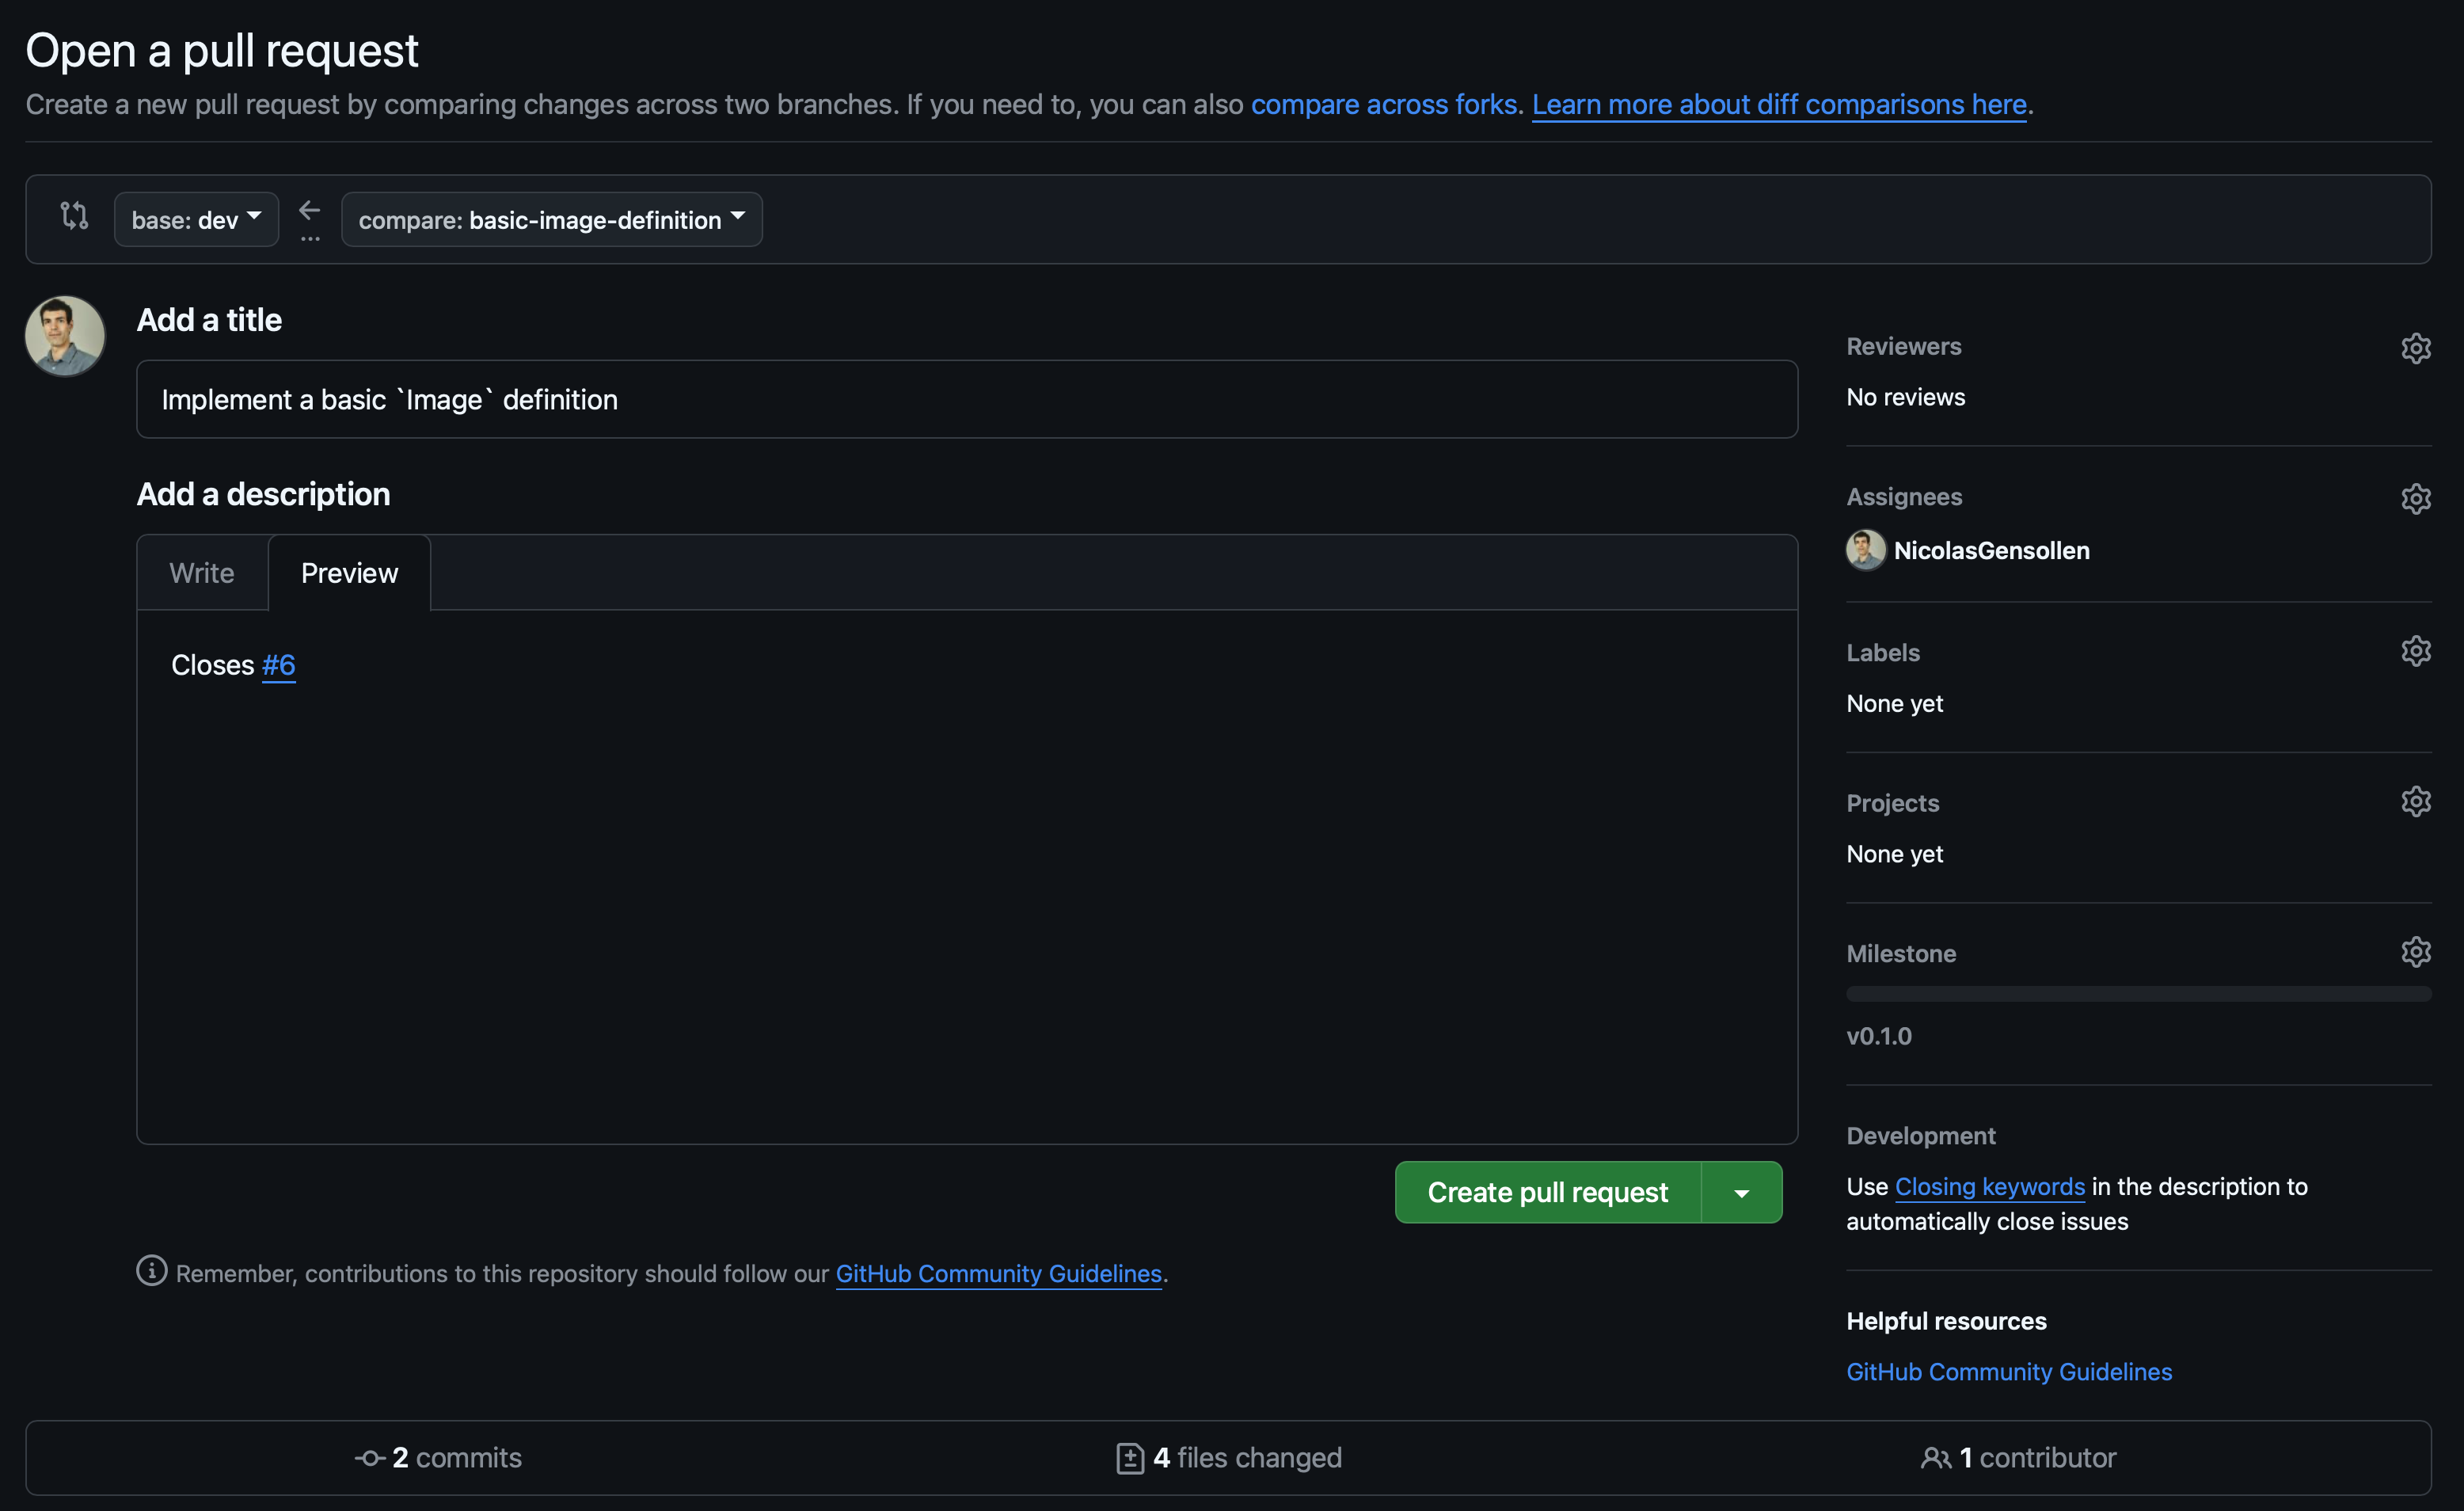

In [15]:
Image(filename="../images/pr_open.png")

Once opened, the Pull Request should look like this:

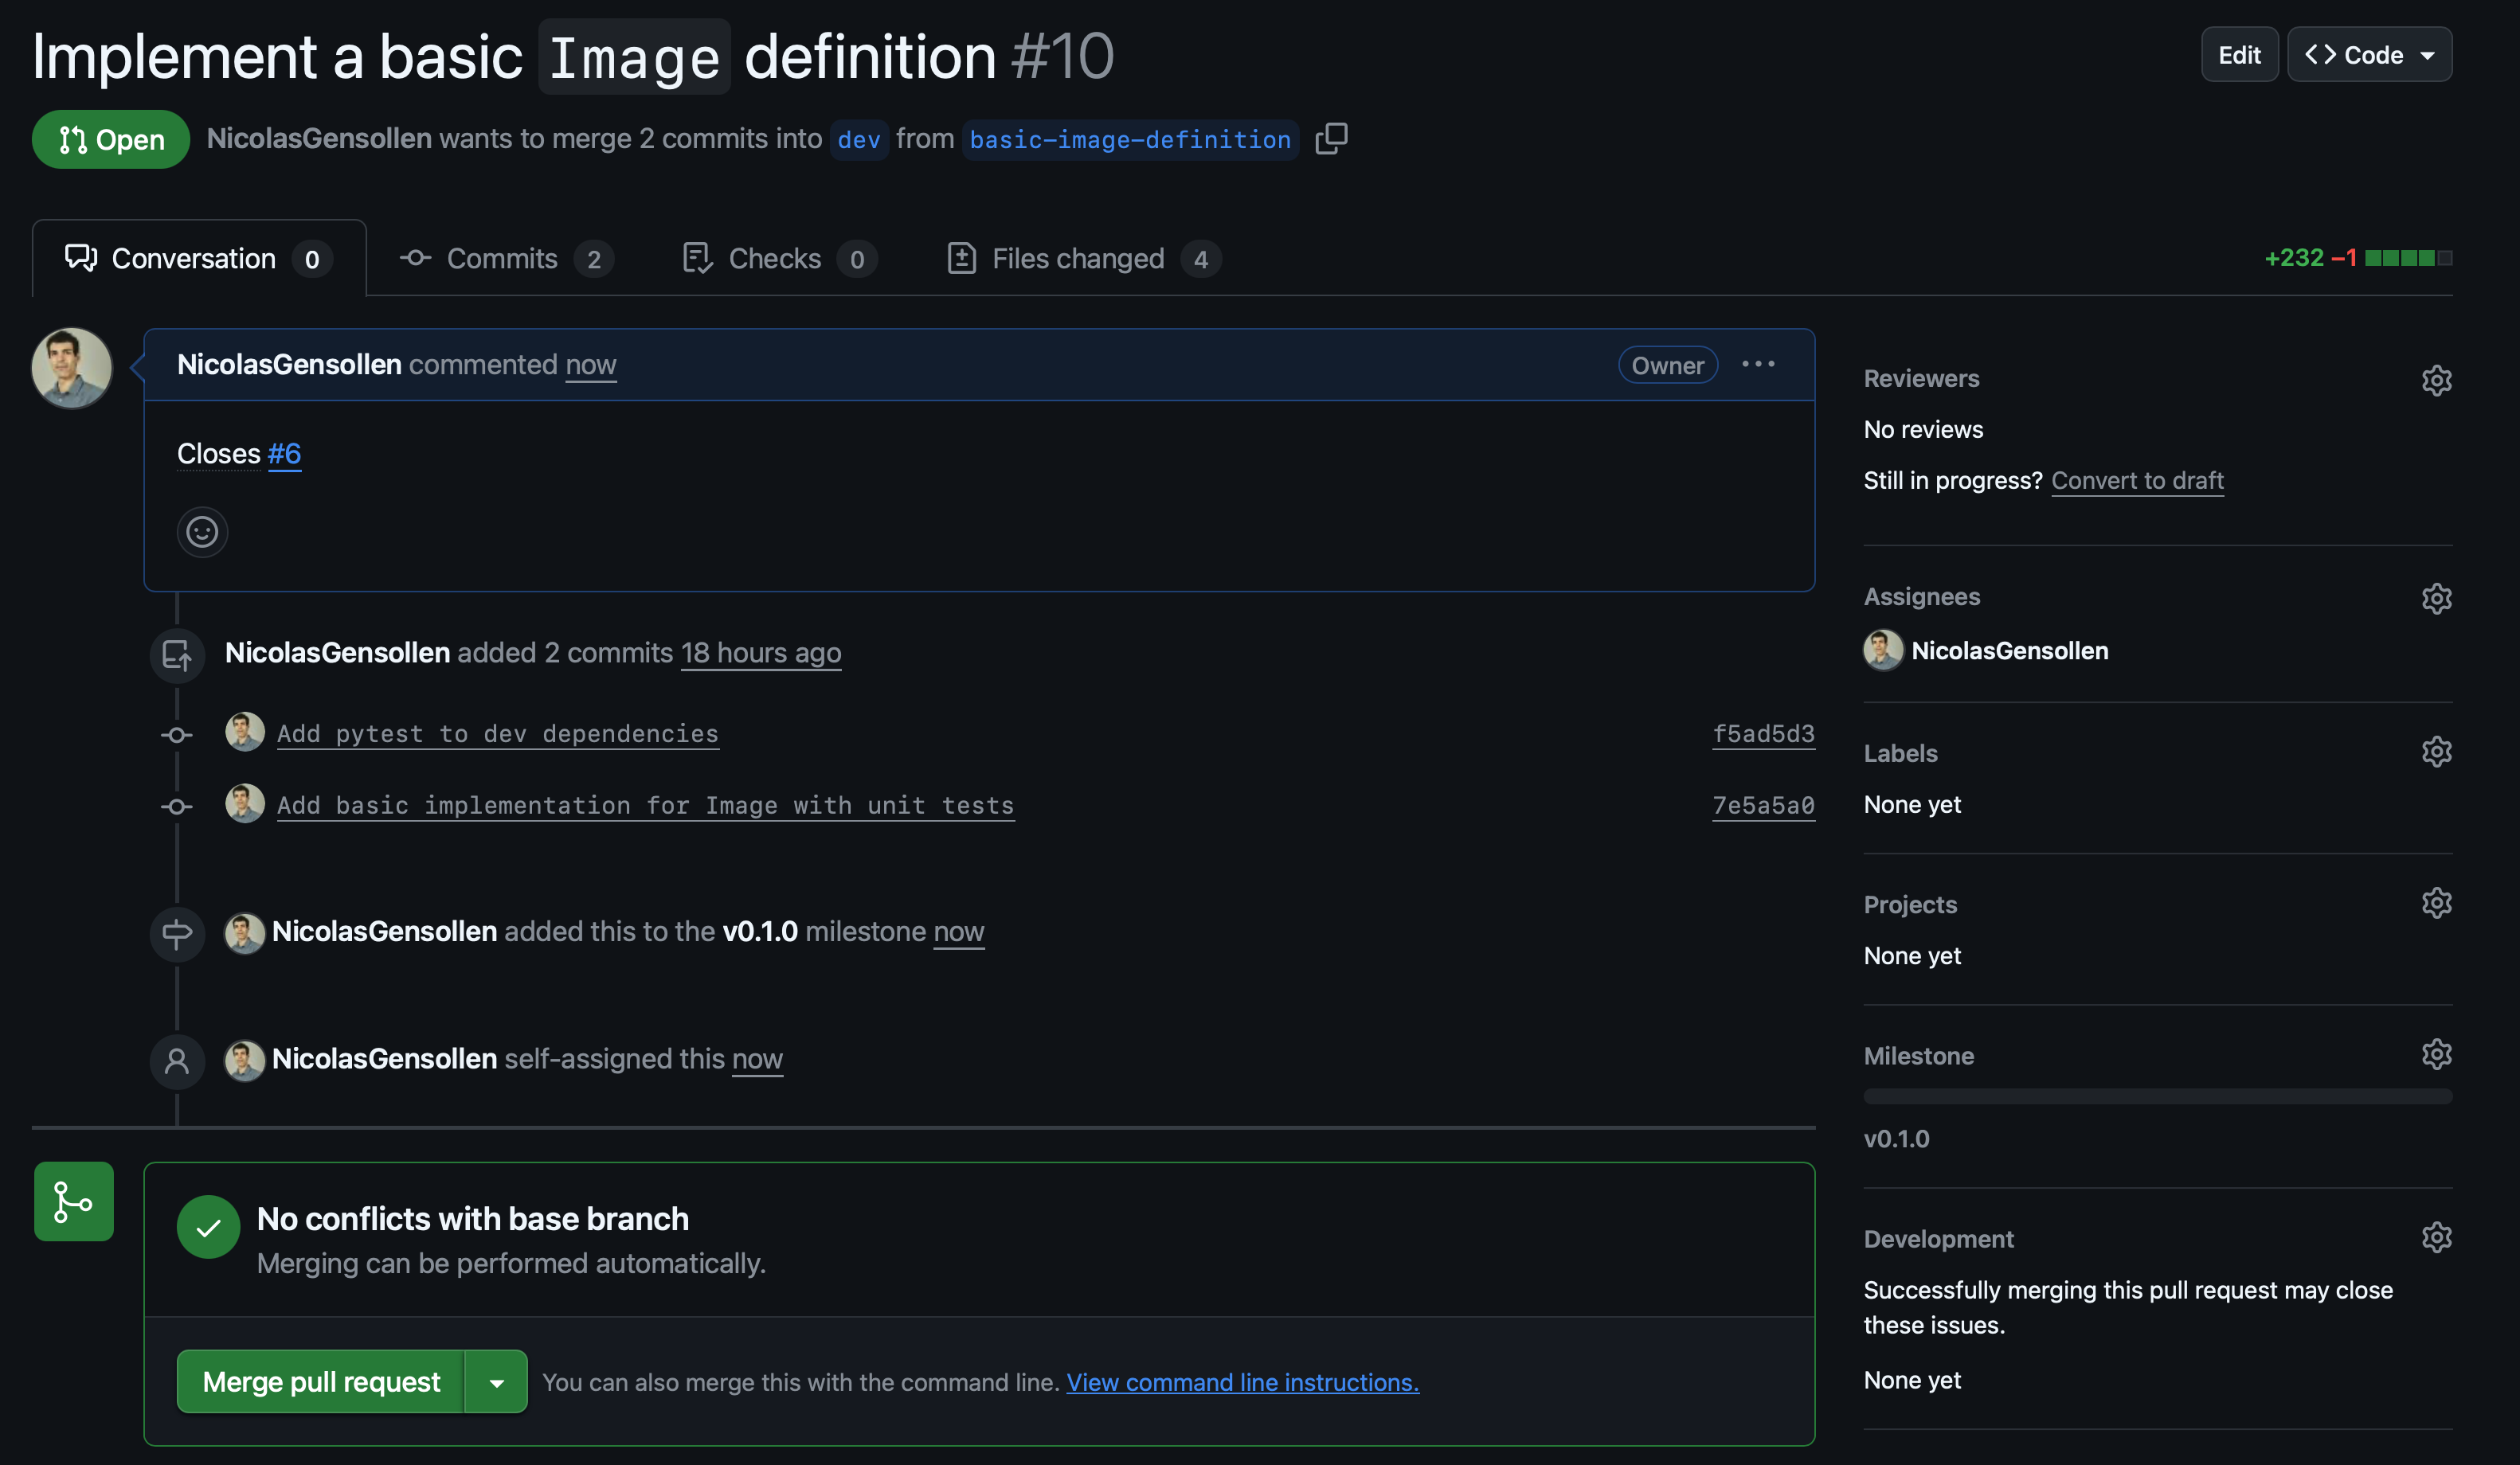

In [16]:
Image(filename="../images/pr_opened.png")

You have 4 tabs, among which the very useful "diff" of the PR:

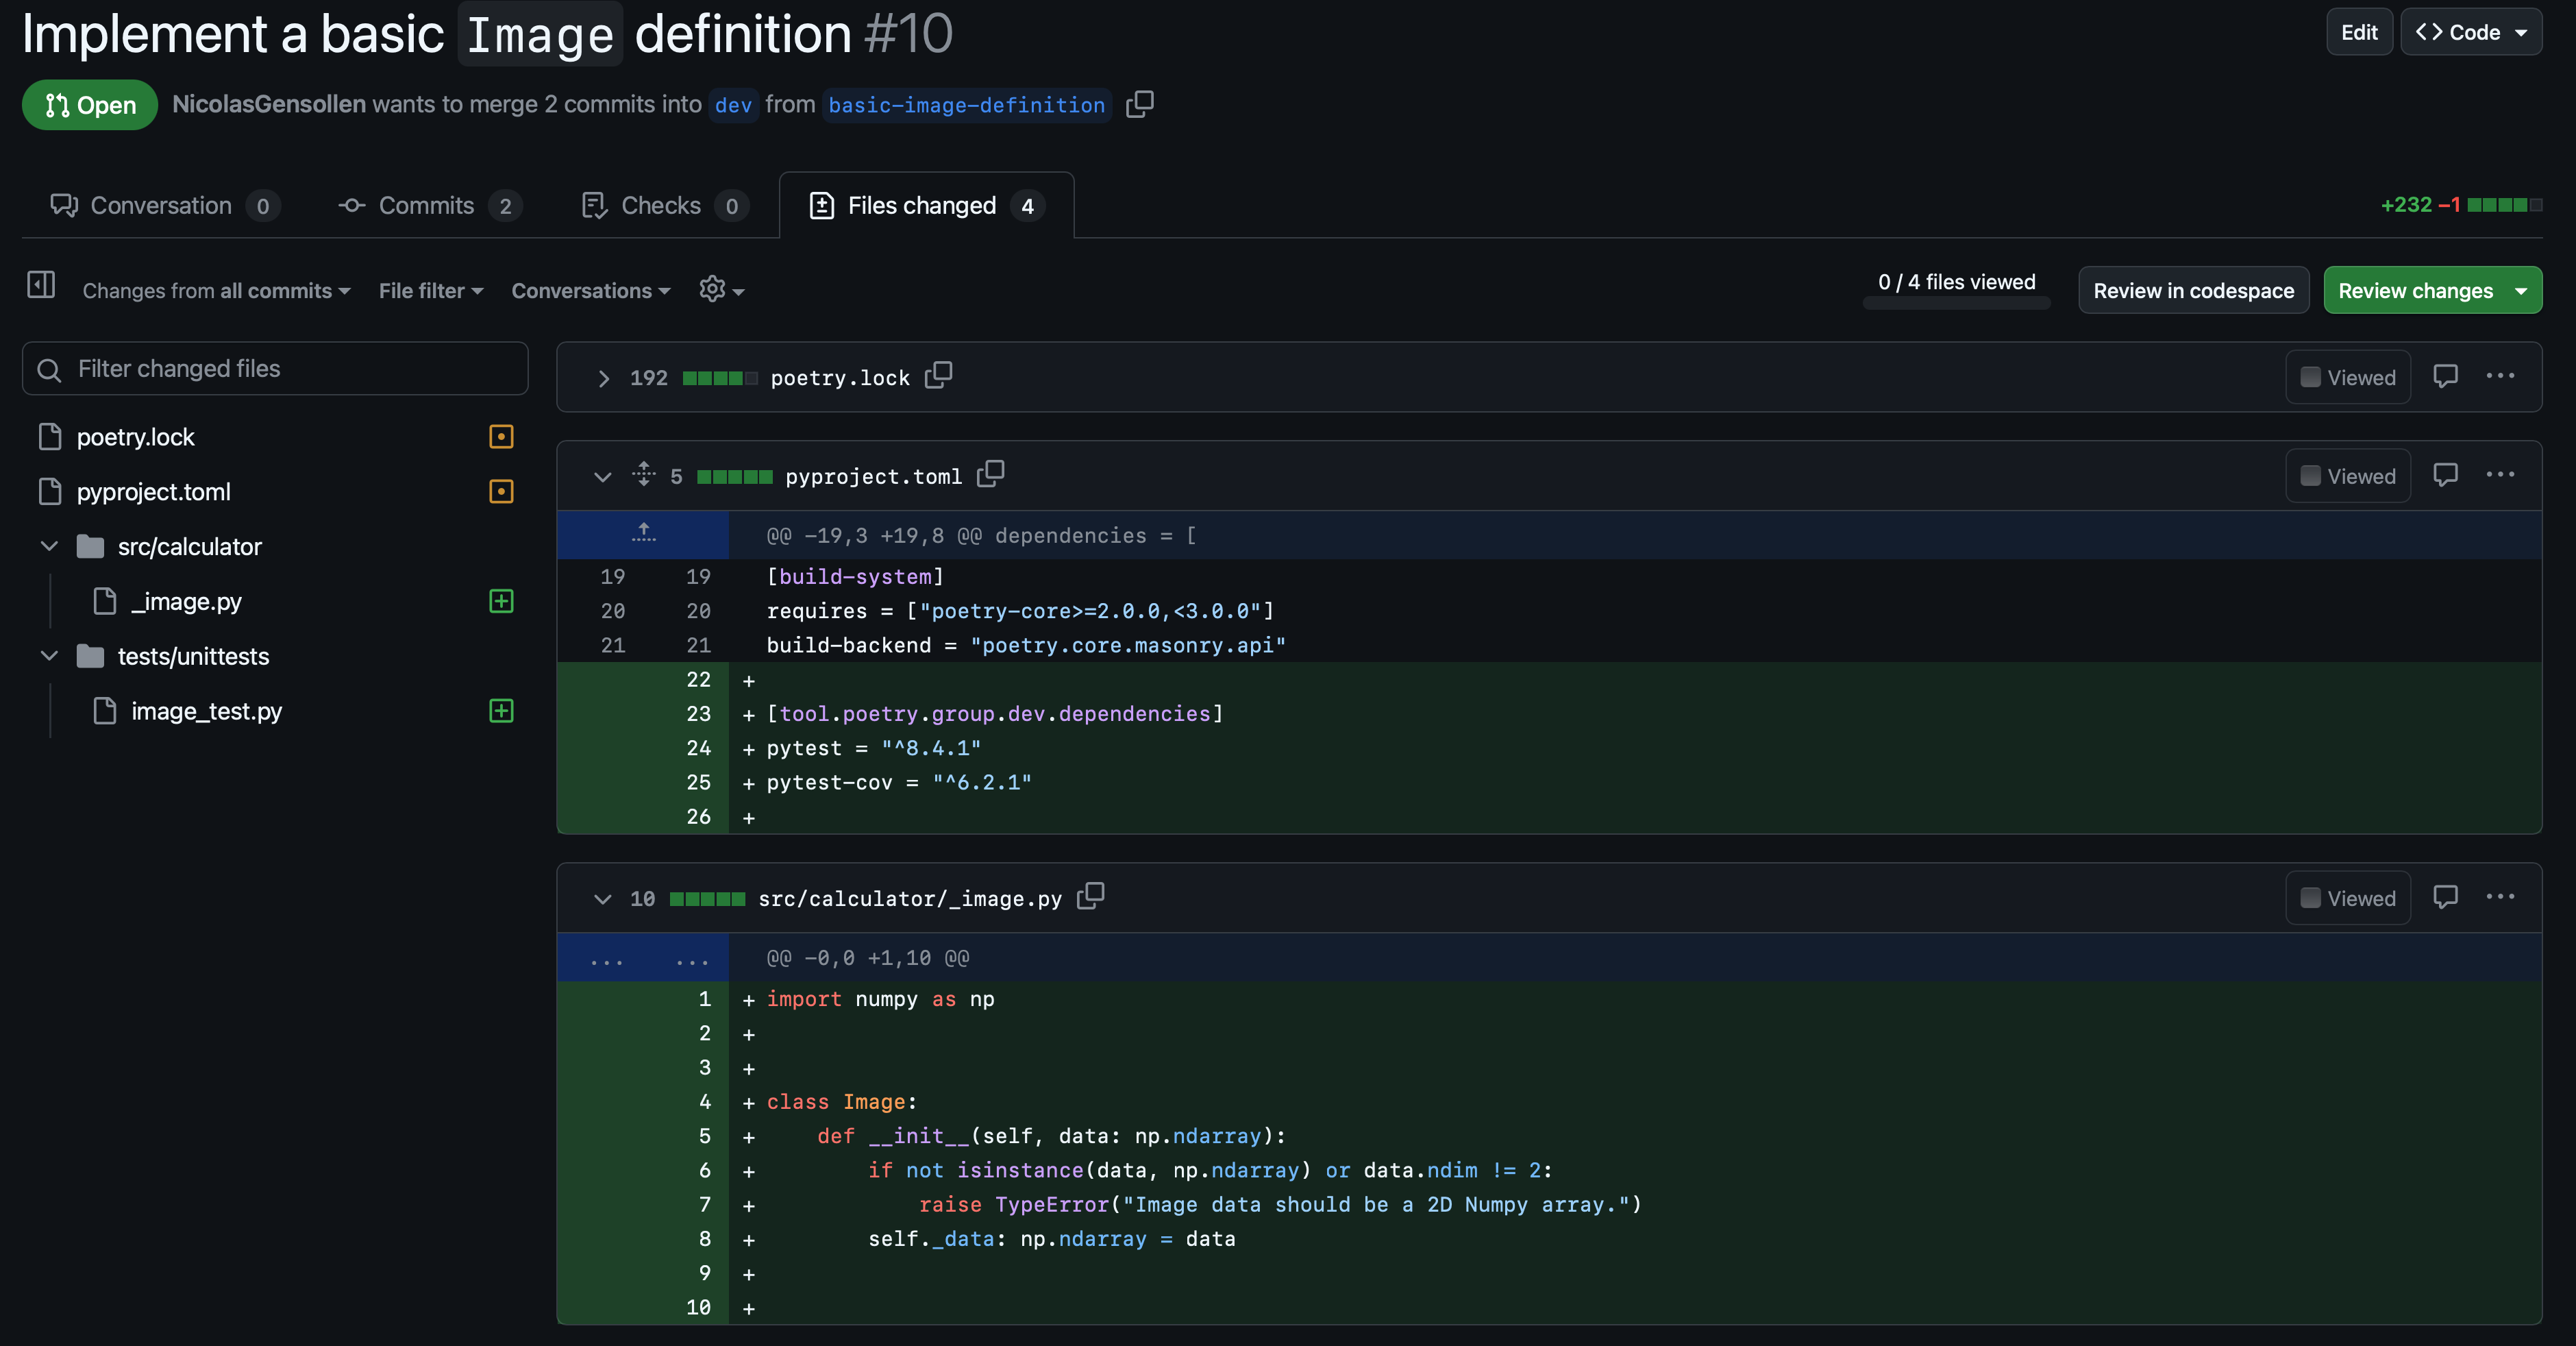

In [17]:
Image(filename="../images/pr_diff.png")

In this tutorial we are working alone, however on real projects you'd be working with other developers. You would then tag one or several reviewers to take a look at your PR and you will enter a review process which can sometimes take a long time of back and forth exchanges between the two sides. The goal of these exchanges is to make sure the code is well written, well tested, maintainable and bug free.

Let's merge this PR using the "Squash and merge" option. In the Aramis team, this is the convention we use to always merge PR using this mode. The idea is that, if the project is well planned, then the PR is adressing an atomic issue and should therefore have a clear name. In the history of the project, we don't want thousands of commits with meaningless messages such as "wip", "testing", "fixing typo" and so on... We instead want to see one commit per merged PR with an explicit name. If we want to get more details, we can open the PR and the linked issue to get all the context and implementation details. Still, we want the developers to feel free to work in an explorative way and make commits as they'd like. Squashing when merging is a way to allow that while preserving a clear history.

<div style="border-left: 6px solid #87CEEB; background-color: #f0f8ff; padding: 5px; margin: 5px;">
    <p>Always Squash and merge a Pull Request in order to have a clear history.</p>
</div>

You can force contributors of a project to squash and merge by going to the repository settings and configuring things like this:

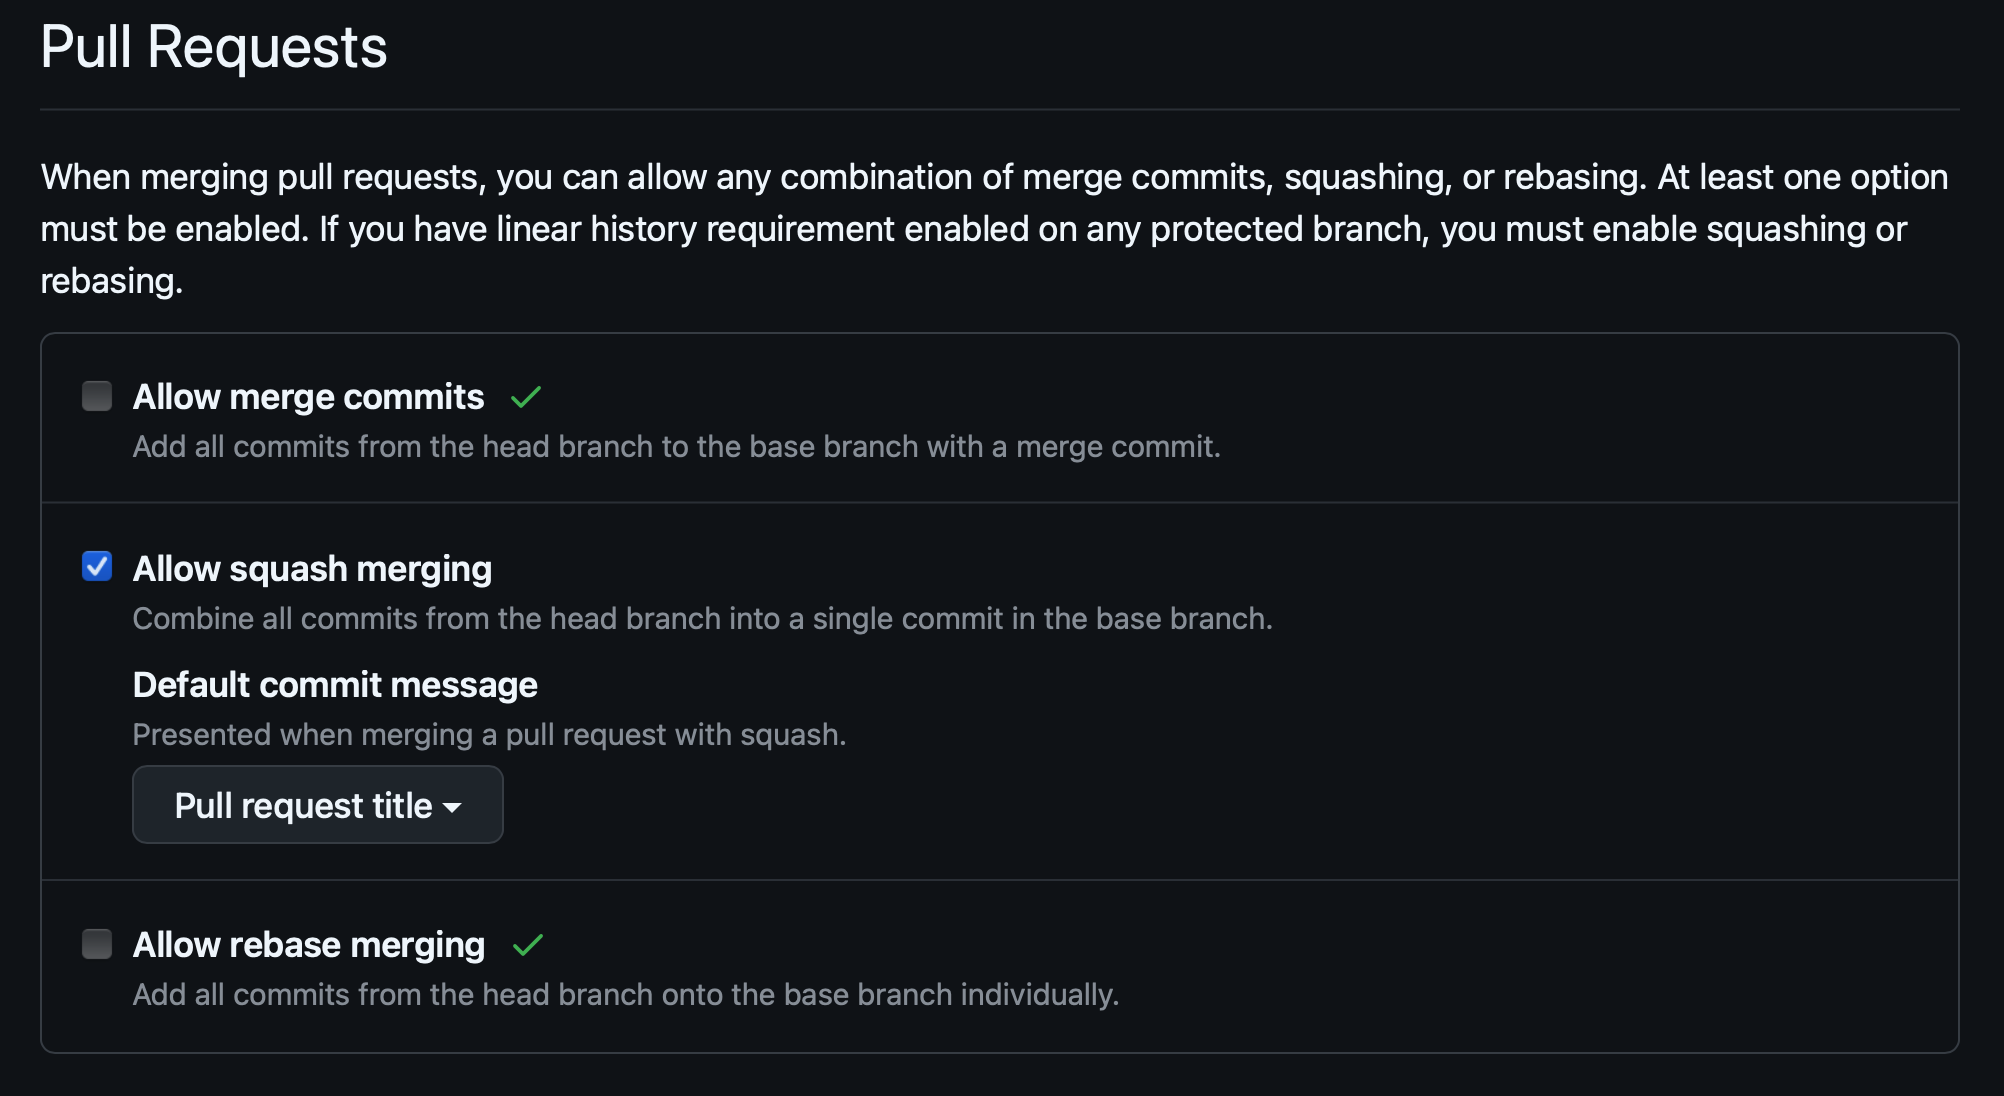

In [18]:
Image(filename="../images/squash_and_merge.png")

Don't forget to clean up your local repository:

```bash
$ git switch dev
$ git pull origin dev
$ git branch -D basic-image-definition
```

In the next chapter we will continue working on this project by implementing the next feature of our roadmap, but we will also see how we can automate various things in the software development process.